#### A. Librerías, variables, funciones y lectura de datos.

In [6]:
#1. Importo librerías.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
#2. Lectura de datos.
series_temporales = pd.read_csv("./inputs/dataset.csv")
diccionario = pd.read_excel("./inputs/diccionario.xlsx",sheet_name="metadata")

#### B. EDA.

In [8]:
#1. Columnas y variables.
print("Tenemos {} columnas. Estas son: {}".format(series_temporales.shape[1],series_temporales.columns))

Tenemos 25 columnas. Estas son: Index(['fecha', 'merval_price_return_ars', 'merval_total_return_ars',
       'embi_spread_arg', 'embi_spreads_brz', 'embi_spread_global',
       'emae_original', 'emae_desestacionalizado', 'emae_tendencia_ciclo',
       'tc_minorista', 'tc_mayorista', 'rrii', 'tamar', 'badlar', 'tm20',
       'tasa_depositos', 'tasa_prestamos_personales', 'base_monetaria',
       'circulacion_monetaria', 'dep_ccorrientes', 'dep_cahorro', 'dep_plazo',
       'inflacion_rem', 'cer', 'uva'],
      dtype='object')


In [9]:
#2. Información general de las variables.
series_temporales.info() 

# Tenemos series temporales con datos nulos......

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      227 non-null    object 
 1   merval_price_return_ars    227 non-null    float64
 2   merval_total_return_ars    227 non-null    float64
 3   embi_spread_arg            217 non-null    float64
 4   embi_spreads_brz           217 non-null    float64
 5   embi_spread_global         217 non-null    float64
 6   emae_original              179 non-null    float64
 7   emae_desestacionalizado    179 non-null    float64
 8   emae_tendencia_ciclo       179 non-null    float64
 9   tc_minorista               225 non-null    float64
 10  tc_mayorista               225 non-null    float64
 11  rrii                       223 non-null    float64
 12  tamar                      224 non-null    float64
 13  badlar                     224 non-null    float64

In [10]:
#3. Convertimos tipo de datos de la fecha a datetime y la ordenamos por dicha variable.
series_temporales["fecha"] = pd.to_datetime(series_temporales["fecha"])
series_temporales = series_temporales.sort_values("fecha")

In [11]:
#4. Borramos filas enteras con NA.
series_temporales.dropna(inplace=True)

In [12]:
#5. Entendemos las fechas de inicio y fin de la Serie temporal
inicio = series_temporales["fecha"].sort_values(ascending=True).iloc[0]
fin = series_temporales["fecha"].sort_values(ascending=False).iloc[0]

print(f"Las series temporales son algunas diarias, y otras mensuales, yendo desde {inicio} a {fin}.")

Las series temporales son algunas diarias, y otras mensuales, yendo desde 2024-10-01 00:00:00 a 2025-06-27 00:00:00.


In [13]:
#6. Tiene fechas repetidas?
print("Fechas unicas: {}".format(series_temporales["fecha"].nunique()))
print("Cantidad de filas totales: {}".format(series_temporales.shape[0]))

Fechas unicas: 170
Cantidad de filas totales: 170


In [14]:
#7. Entre el inicio y fin hay 170 fechas?
print("Tenemos una apertura de fechas de {} días".format(fin - inicio))
print("Debería cubrir {} días".format(series_temporales.shape[0]))

Tenemos una apertura de fechas de 269 days 00:00:00 días
Debería cubrir 170 días


In [15]:
#8. Que fechas faltan?
inicio = series_temporales["fecha"].min()
fin = series_temporales["fecha"].max()

rango_completo = pd.date_range(start=inicio, end=fin, freq='D')

fechas_reales = series_temporales["fecha"].unique()

fechas_faltantes = rango_completo.difference(fechas_reales)

print("Cantidad de fechas faltantes:", len(fechas_faltantes))
print("Fechas faltantes:")
print(fechas_faltantes)

# Tenemos fechas faltantes... las series temporales para considerarse tales tienen que ser constantes en sus intervalos.


Cantidad de fechas faltantes: 100
Fechas faltantes:
DatetimeIndex(['2024-10-05', '2024-10-06', '2024-10-11', '2024-10-12',
               '2024-10-13', '2024-10-14', '2024-10-19', '2024-10-20',
               '2024-10-26', '2024-10-27', '2024-11-02', '2024-11-03',
               '2024-11-06', '2024-11-09', '2024-11-10', '2024-11-11',
               '2024-11-16', '2024-11-17', '2024-11-18', '2024-11-23',
               '2024-11-24', '2024-11-28', '2024-11-30', '2024-12-01',
               '2024-12-07', '2024-12-08', '2024-12-14', '2024-12-15',
               '2024-12-21', '2024-12-22', '2024-12-24', '2024-12-25',
               '2024-12-28', '2024-12-29', '2024-12-31', '2025-01-01',
               '2025-01-04', '2025-01-05', '2025-01-11', '2025-01-12',
               '2025-01-18', '2025-01-19', '2025-01-20', '2025-01-25',
               '2025-01-26', '2025-02-01', '2025-02-02', '2025-02-08',
               '2025-02-09', '2025-02-15', '2025-02-16', '2025-02-17',
               '2025-02-2

Notar que parecen faltar los días no hábiles

A revisar, pero quizas no es tan grave y podemos imputar esos dias que no estén.

In [16]:
#9. Analisis estadísticos descriptivos básicos de las series temporales.
series_temporales.describe()

fecha  merval_price_return_ars  \
count                            170             1.700000e+02   
mean   2025-02-12 05:30:21.176470528             1.960435e+06   
min              2024-10-01 00:00:00             1.505155e+06   
25%              2024-12-06 18:00:00             1.828004e+06   
50%              2025-02-11 12:00:00             1.974270e+06   
75%              2025-04-21 18:00:00             2.093516e+06   
max              2025-06-27 00:00:00             2.477002e+06   
std                              NaN             2.249850e+05   

       merval_total_return_ars  embi_spread_arg  embi_spreads_brz  \
count             1.700000e+02       170.000000        170.000000   
mean              2.243374e+06       754.941629        219.442835   
min               1.714594e+06         0.000000        194.874000   
25%               2.090946e+06       666.268750        211.812750   
50%               2.255281e+06       713.116500        219.809500   
75%               2.391635e+06       768.469500        228.046250   
max               2.829730e+06      1287.887000        253.062000   
std               2.571429e+05       165.114528         13.073026   

       embi_spread_global  emae_original  emae_desestacionalizado  \
count          170.000000     170.000000               170.000000   
mean           303.437871     151.367938               151.647027   
min            282.660000     141.160093               149.065941   
25%            294.220500     147.997528               150.628710   
50%            299.545500     148.563268               152.275523   
75%            306.115250     156.744630               152.440207   
max            353.552000     165.068610               153.378984   
std             14.507234       7.014210                 1.307312   

       emae_tendencia_ciclo  tc_minorista  ...  tasa_depositos  \
count            170.000000    170.000000  ...      170.000000   
mean             151.098645   1095.023882  ...       32.313118   
min              148.208726   1005.530000  ...       26.610000   
25%              149.961937   1044.937500  ...       30.167500   
50%              151.413009   1086.240000  ...       31.750000   
75%              152.524114   1152.145000  ...       34.027500   
max              153.371651   1233.990000  ...       41.120000   
std                1.685113     63.113695  ...        3.517350   

       tasa_prestamos_personales  base_monetaria  circulacion_monetaria  \
count                 170.000000    1.700000e+02           1.700000e+02   
mean                   70.403353    2.985982e+07           1.945985e+07   
min                    66.030000    2.215094e+07           1.483190e+07   
25%                    68.855000    2.688587e+07           1.691674e+07   
50%                    70.200000    3.016851e+07           2.016576e+07   
75%                    71.875000    3.326755e+07           2.153040e+07   
max                    76.040000    3.737292e+07           2.289466e+07   
std                     2.208165    4.157178e+06           2.450881e+06   

       dep_ccorrientes   dep_cahorro     dep_plazo  inflacion_rem  \
count     1.700000e+02  1.700000e+02  1.700000e+02     170.000000   
mean      2.493608e+07  5.263160e+07  5.731337e+07      25.294118   
min       2.004217e+07  4.509822e+07  4.486559e+07      20.800000   
25%       2.332261e+07  5.007575e+07  5.231836e+07      21.900000   
50%       2.469203e+07  5.259853e+07  5.879137e+07      24.500000   
75%       2.658488e+07  5.485615e+07  6.101745e+07      26.300000   
max       2.988655e+07  6.099340e+07  6.983792e+07      35.000000   
std       2.271735e+06  3.321555e+06  6.328244e+06       4.509329   

                cer          uva  
count  1.700000e+02   170.000000  
mean   5.355516e+06  1350.635471  
min    4.699775e+06  1185.220000  
25%    5.055272e+06  1274.922500  
50%    5.339373e+06  1347.210000  
75%    5.650641e+06  1423.527500  
max    6.010432e+06  1517.080000  
std    3.709507e+05    93.60

#### C. Análisis básicos en el Dominio del Tiempo.

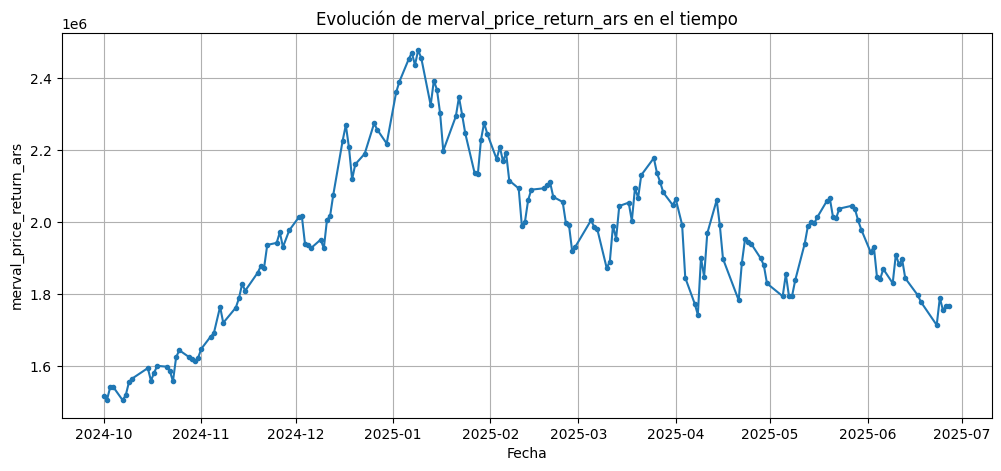

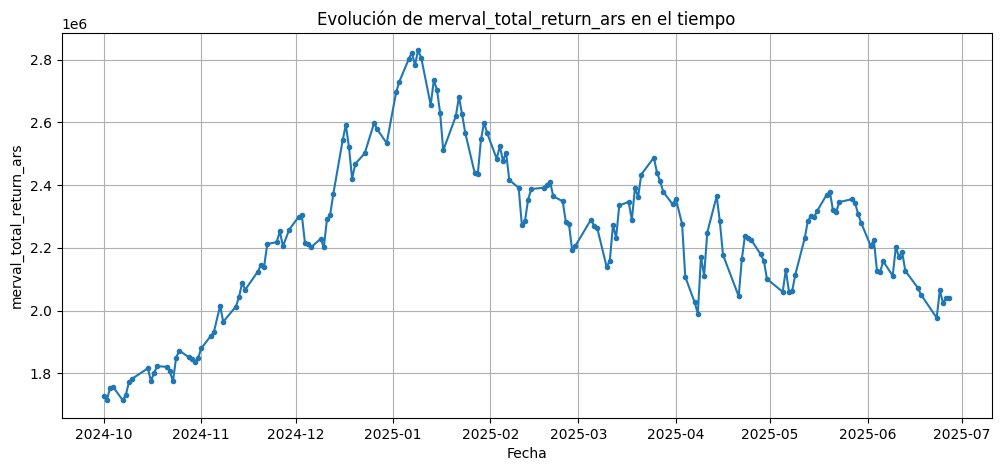

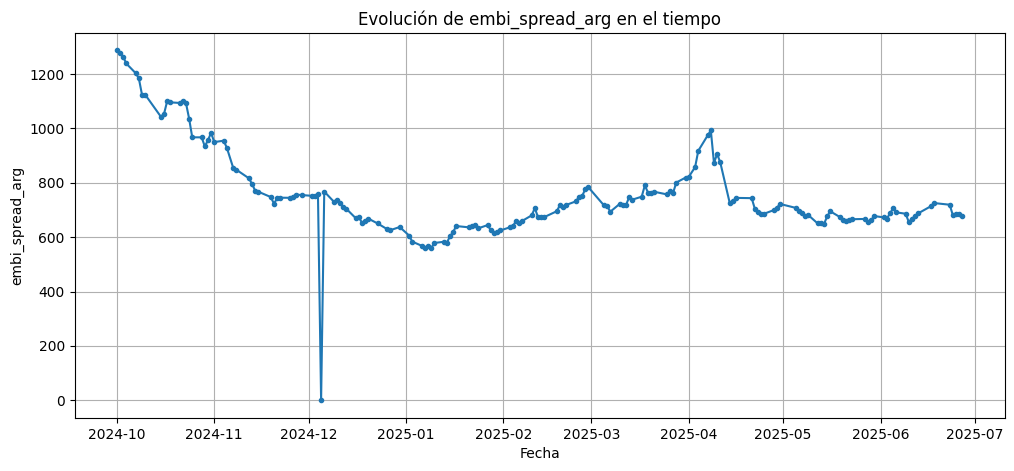

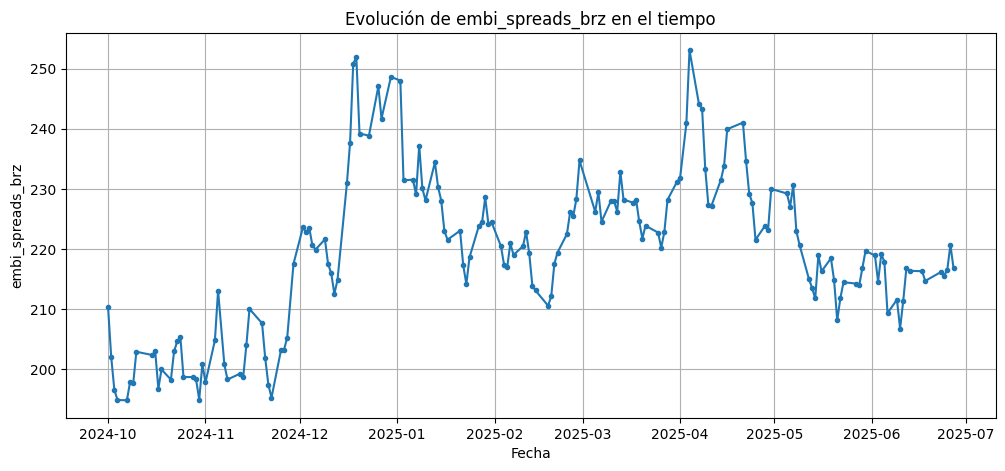

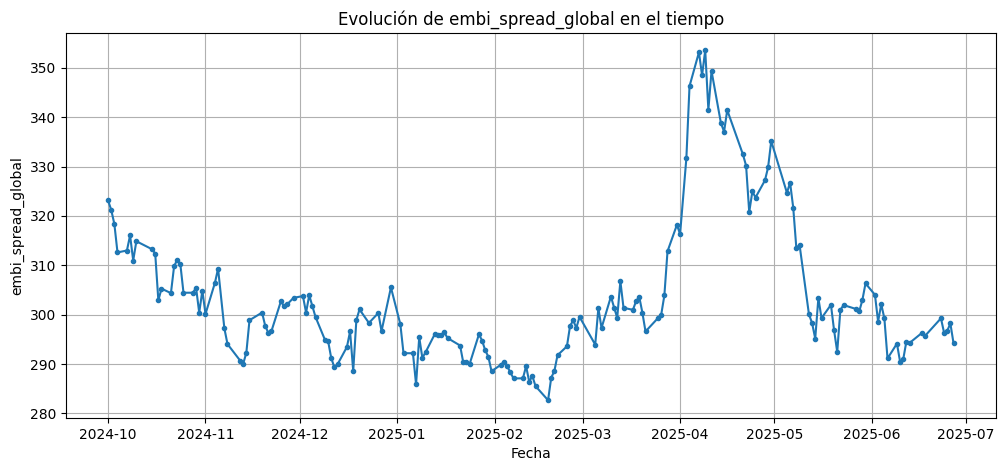

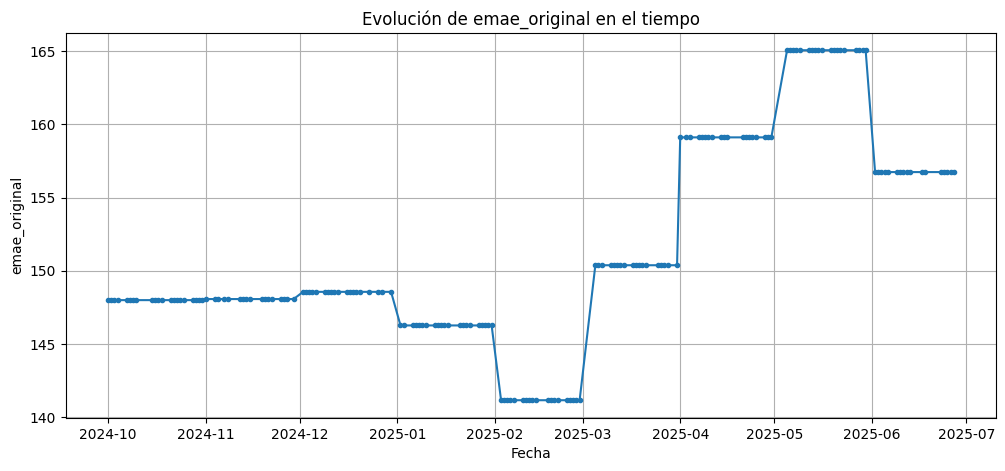

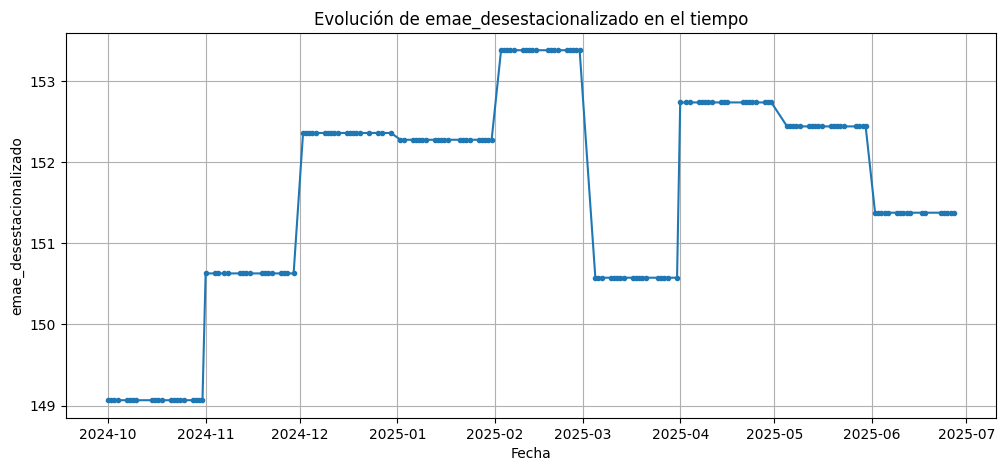

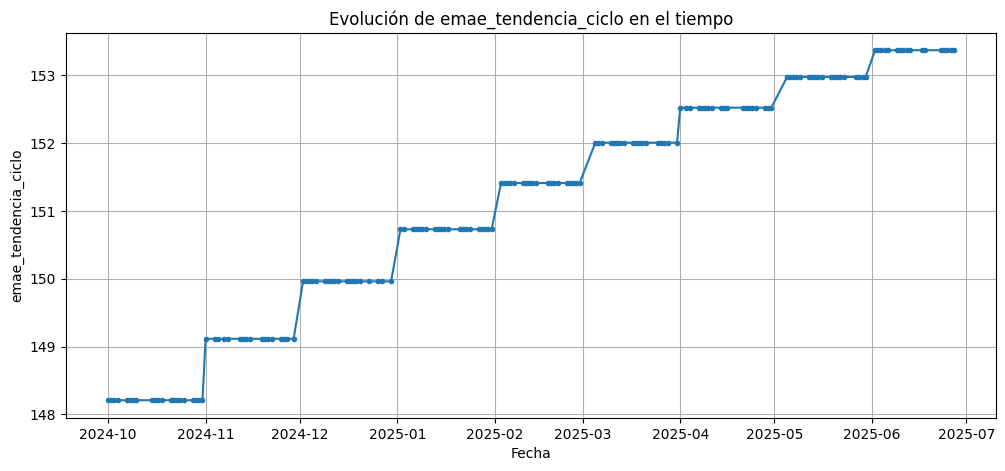

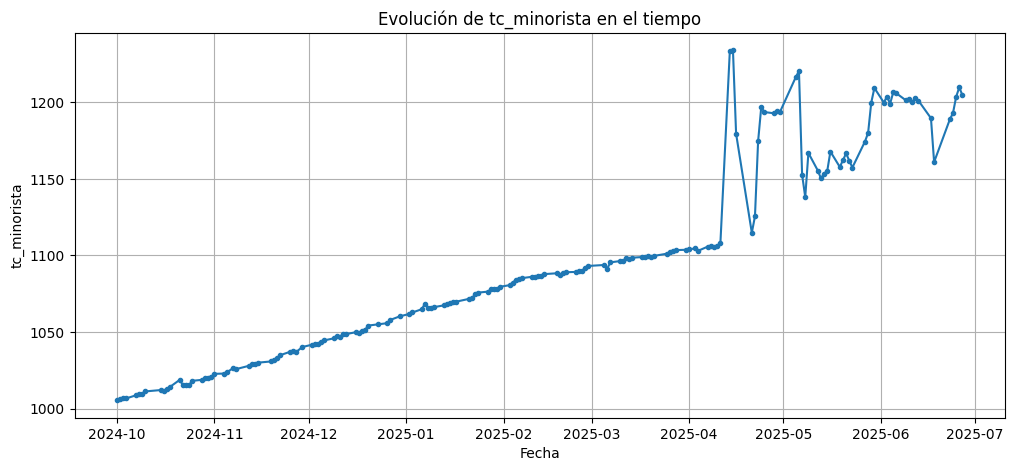

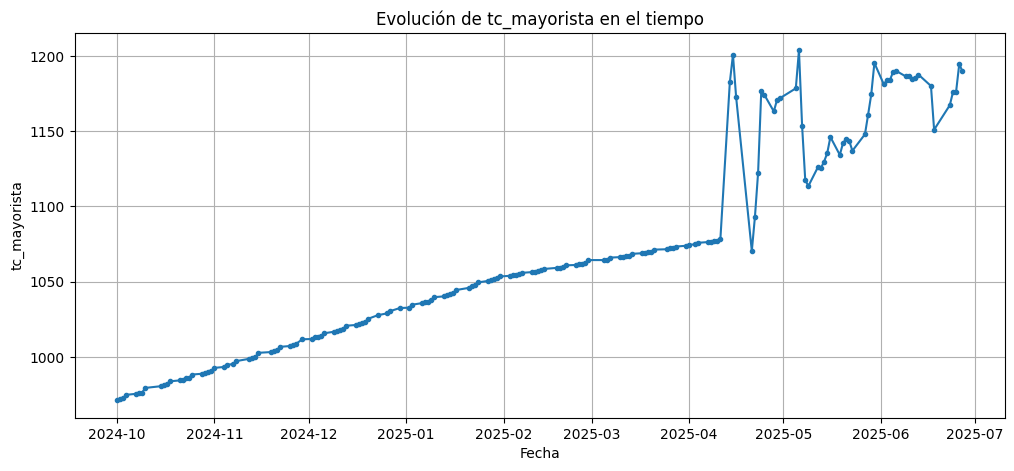

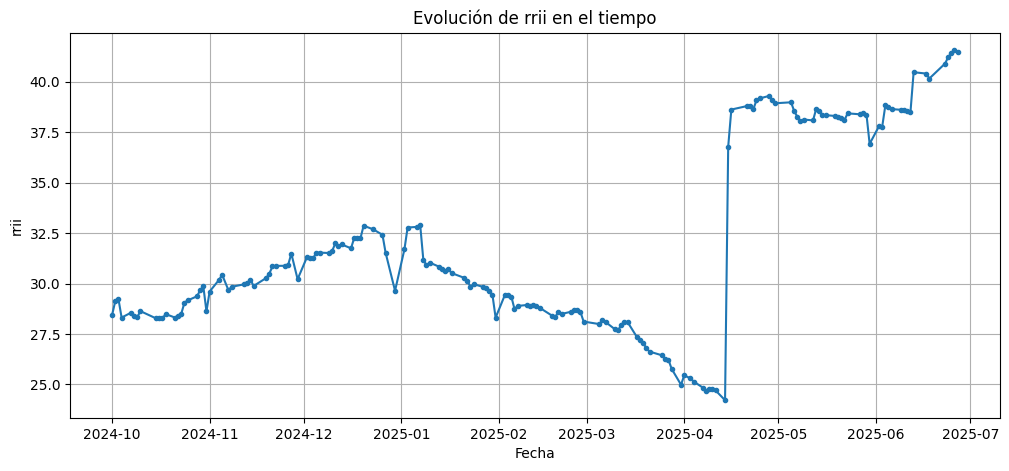

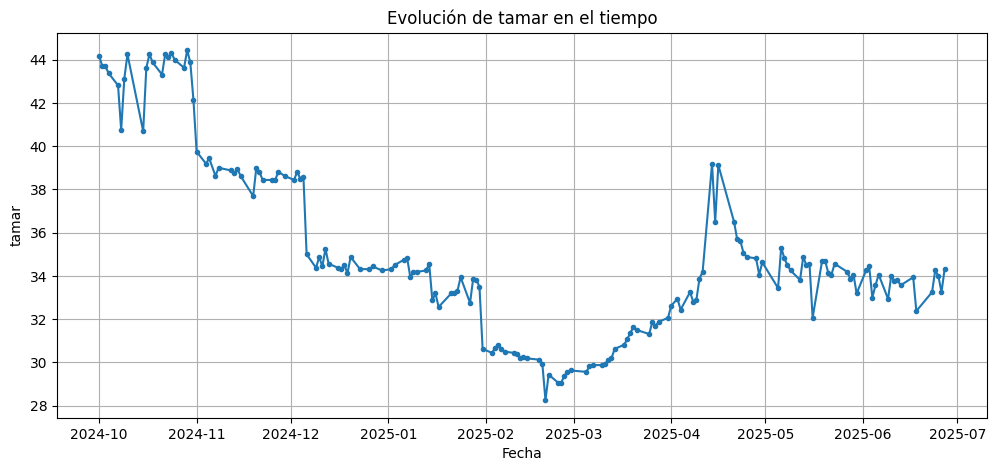

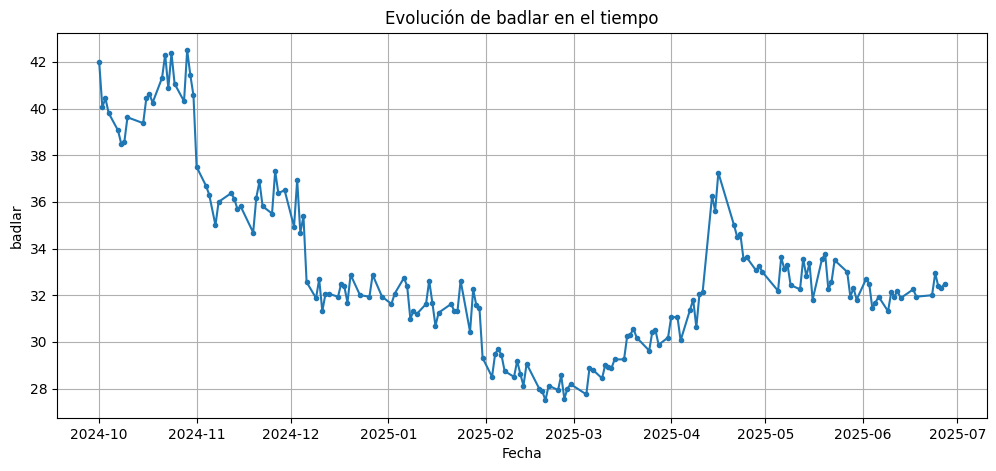

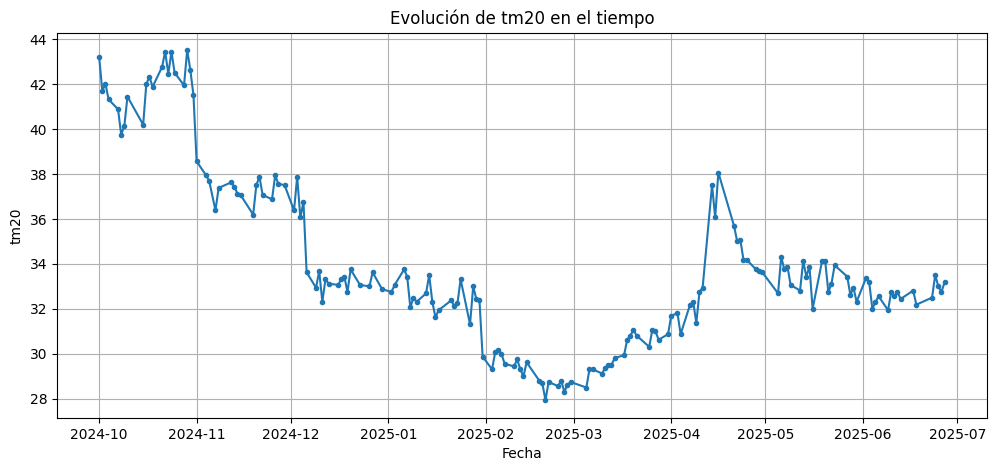

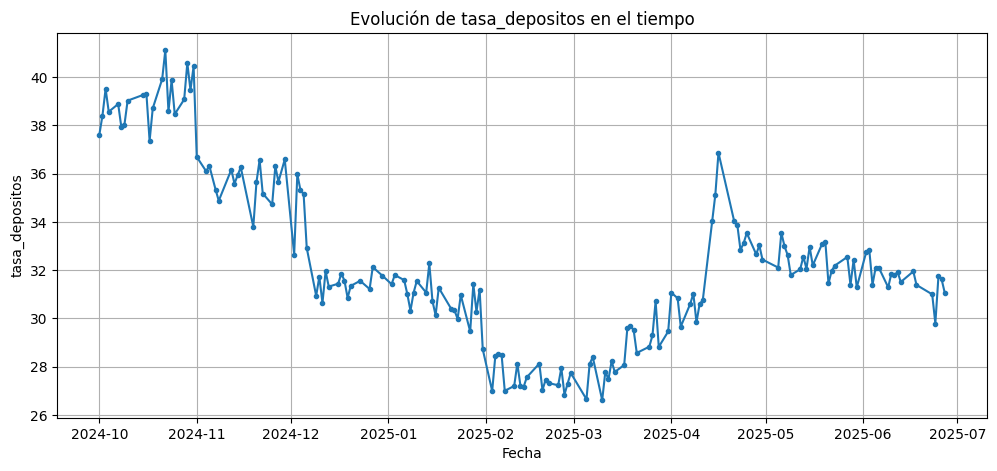

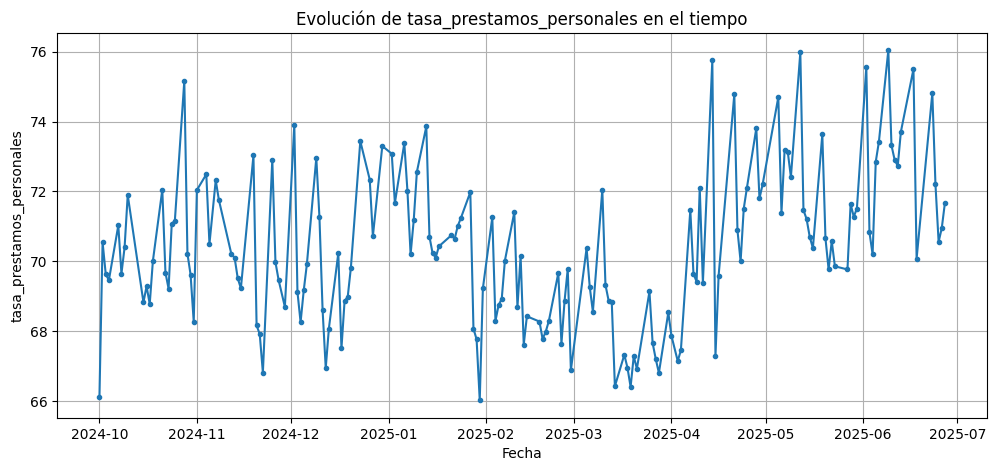

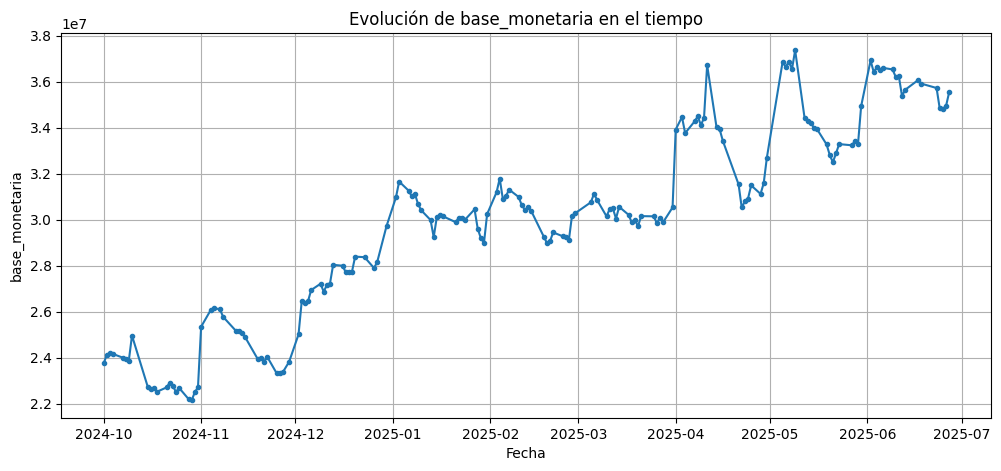

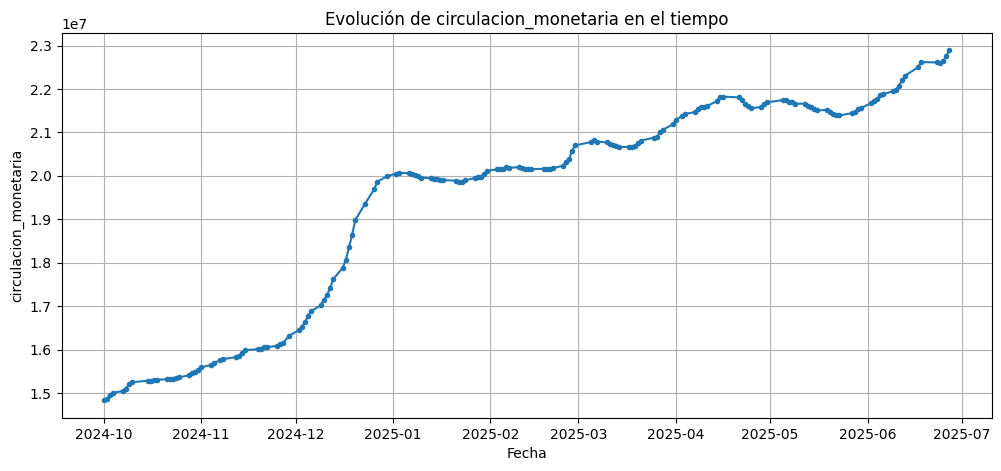

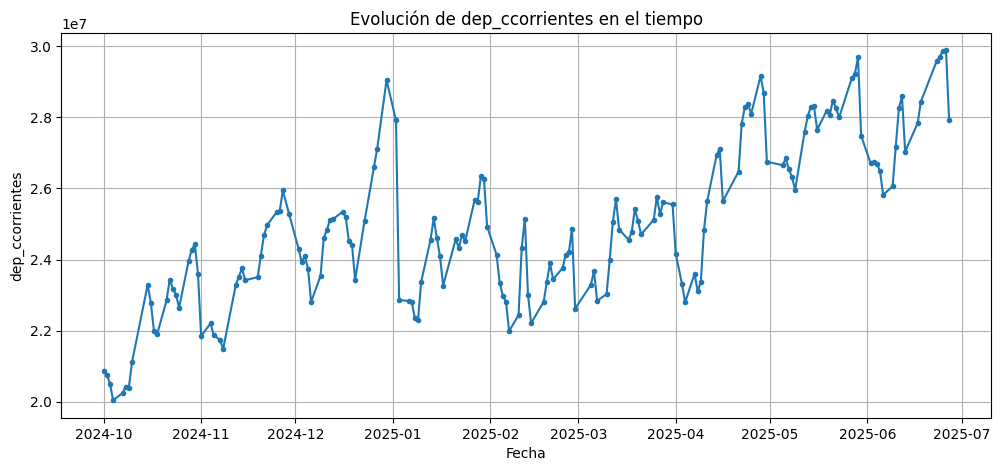

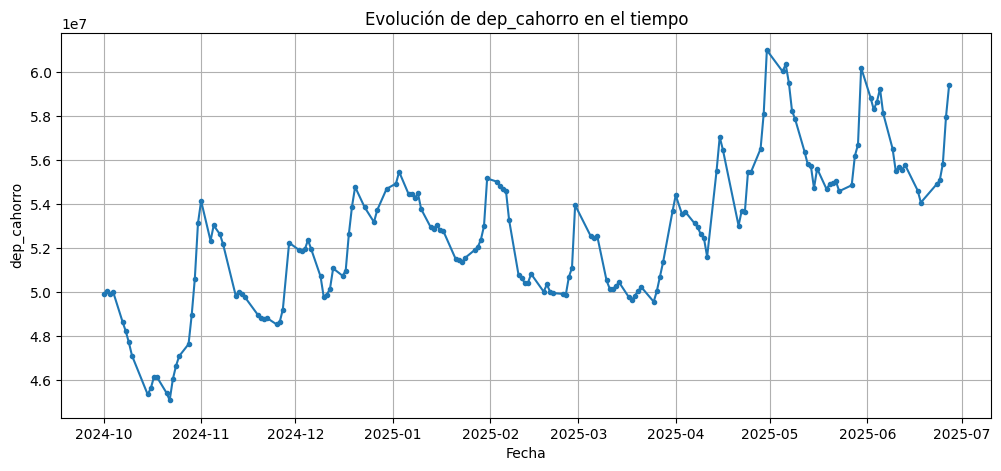

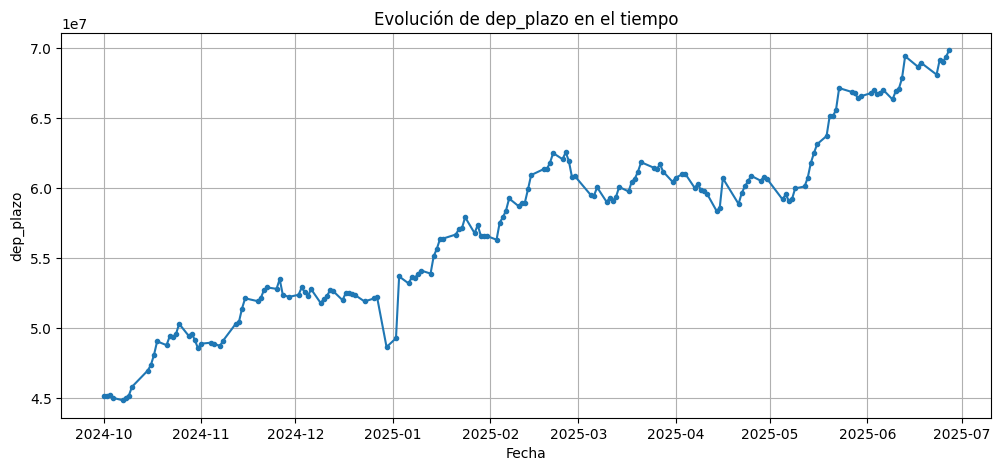

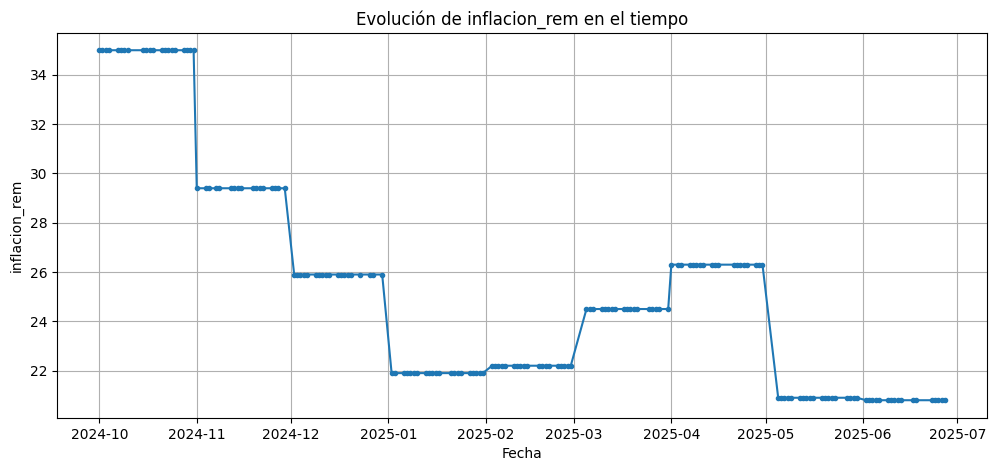

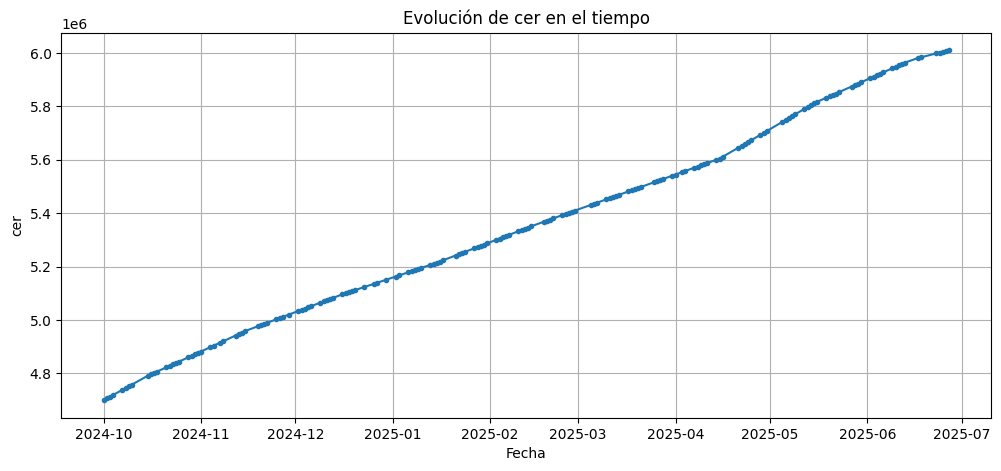

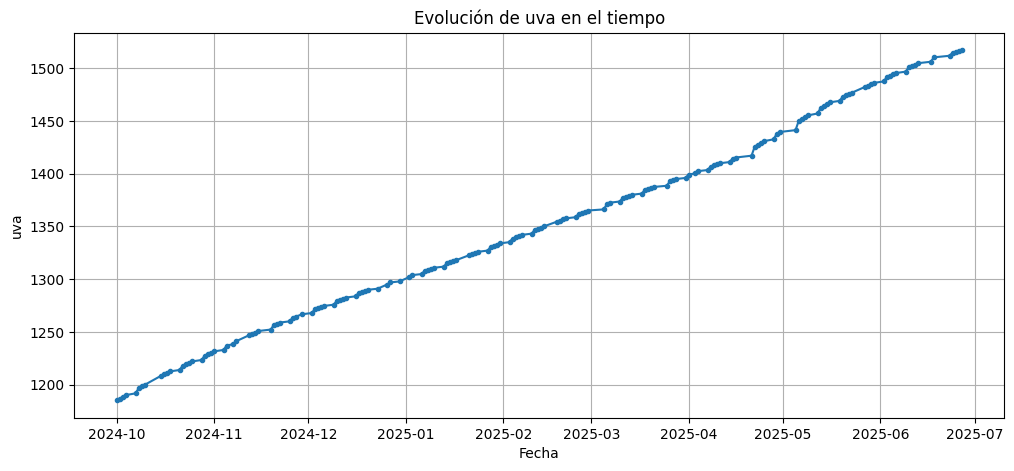

In [17]:
#1. Listamos las columnas numéricas (excluyendo 'fecha')
variables = series_temporales.drop(columns=["fecha"]).columns

#2. Graficamos cada variable en un gráfico separado
for var in variables:
    plt.figure(figsize=(12,5))  # Nueva figura para cada variable
    plt.plot(series_temporales["fecha"], series_temporales[var], marker='.')
    plt.title(f"Evolución de {var} en el tiempo")
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


#### D. Análisis en el Dominio de la Frecuencia (con TTF).

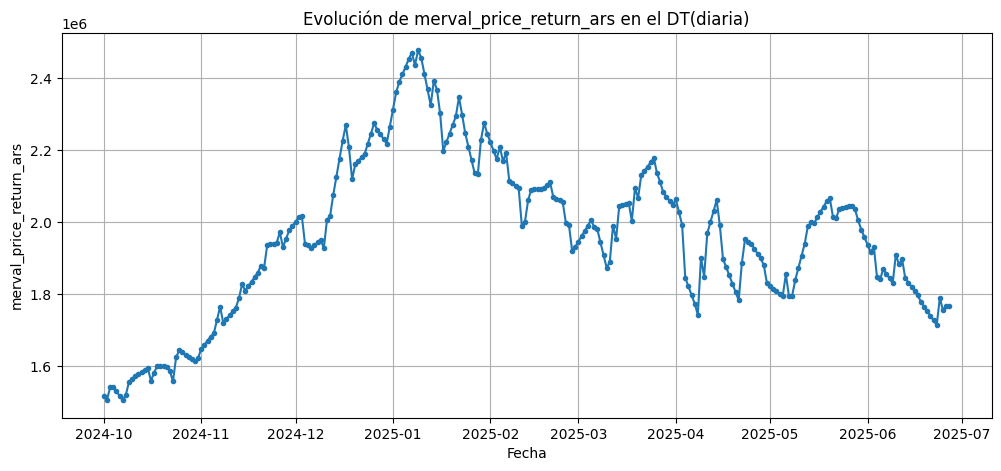

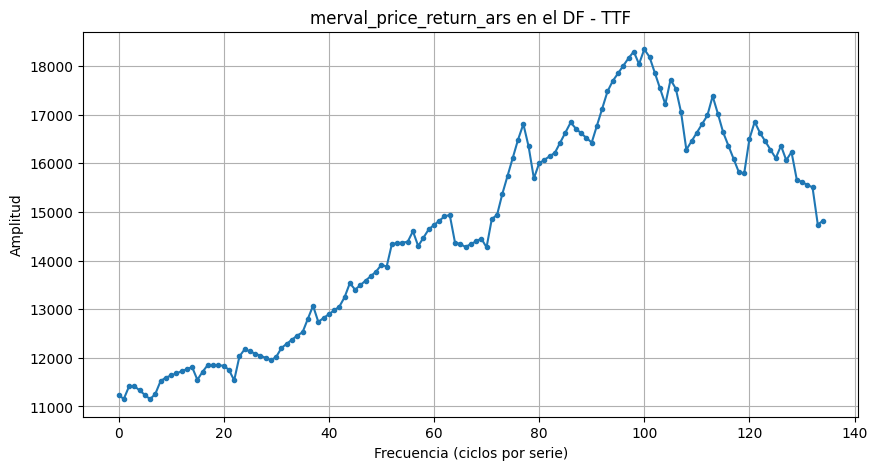

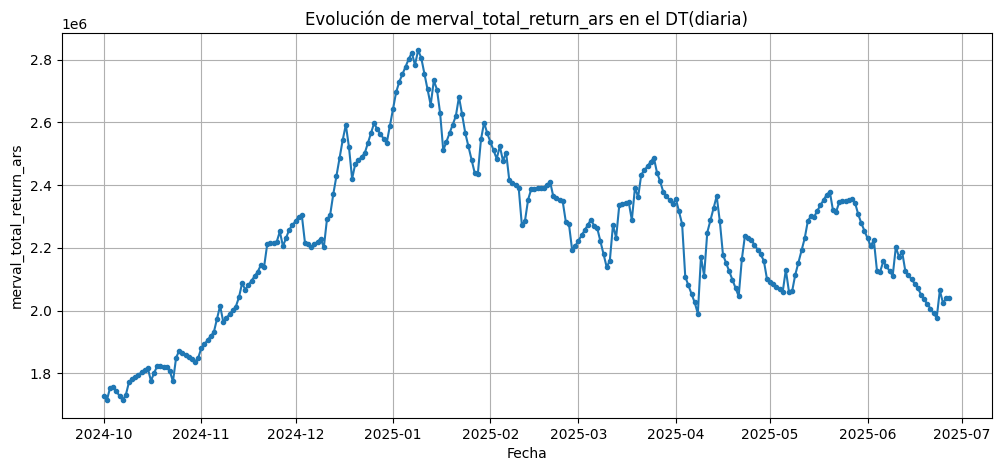

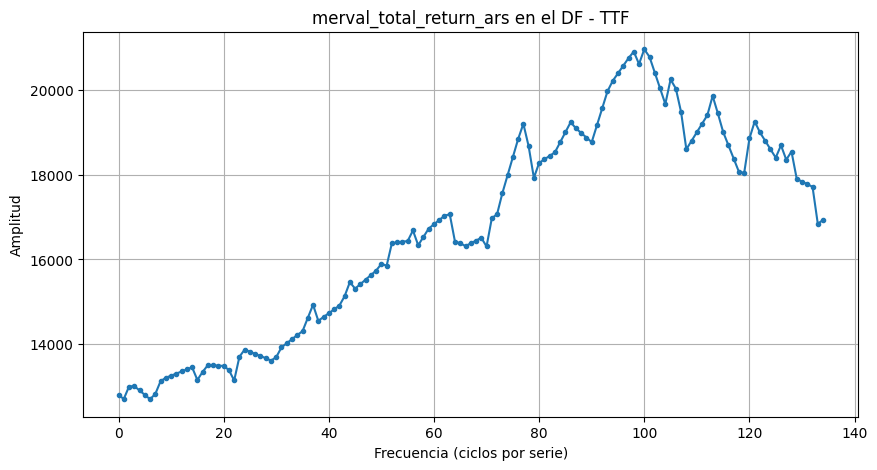

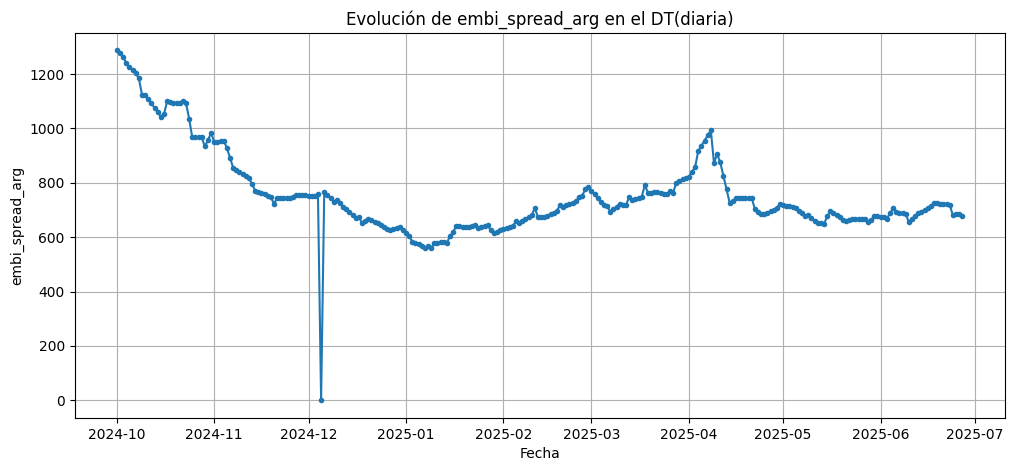

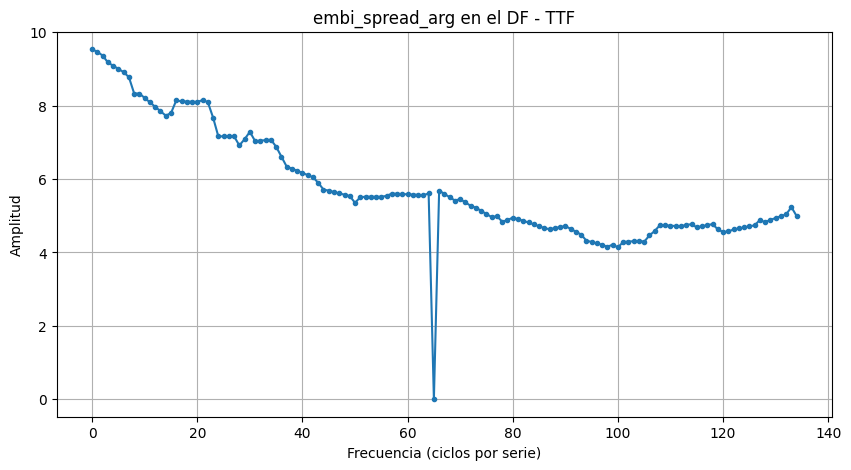

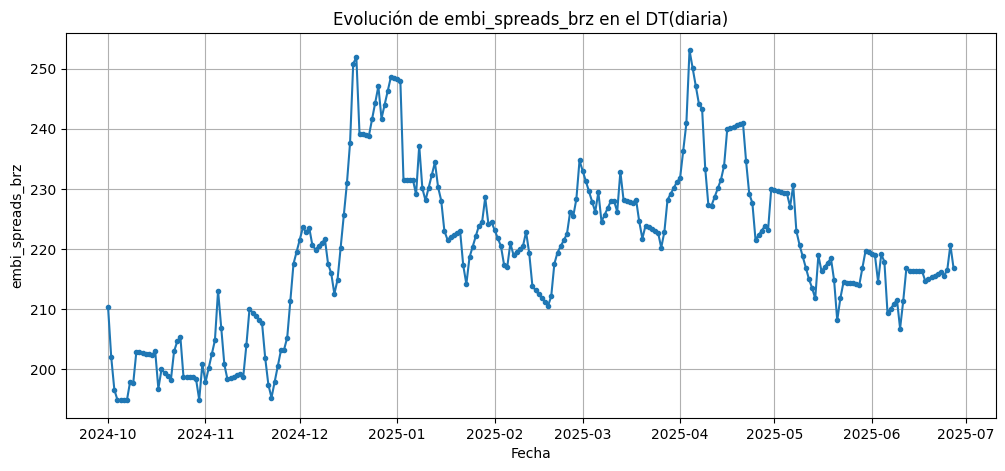

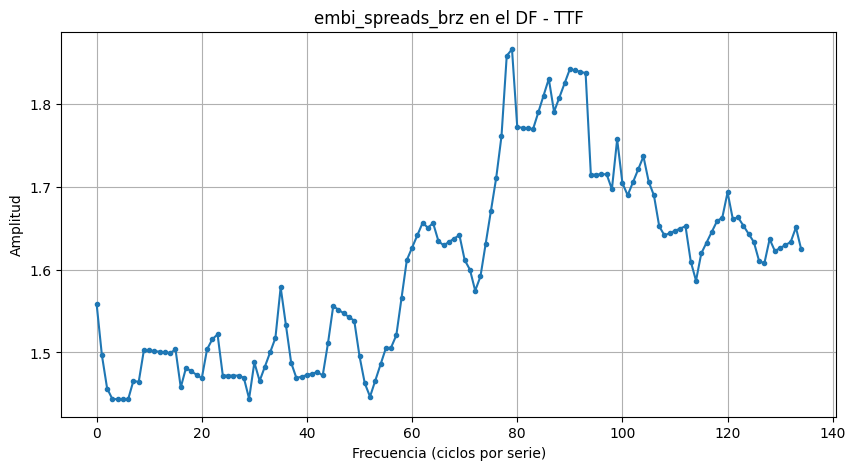

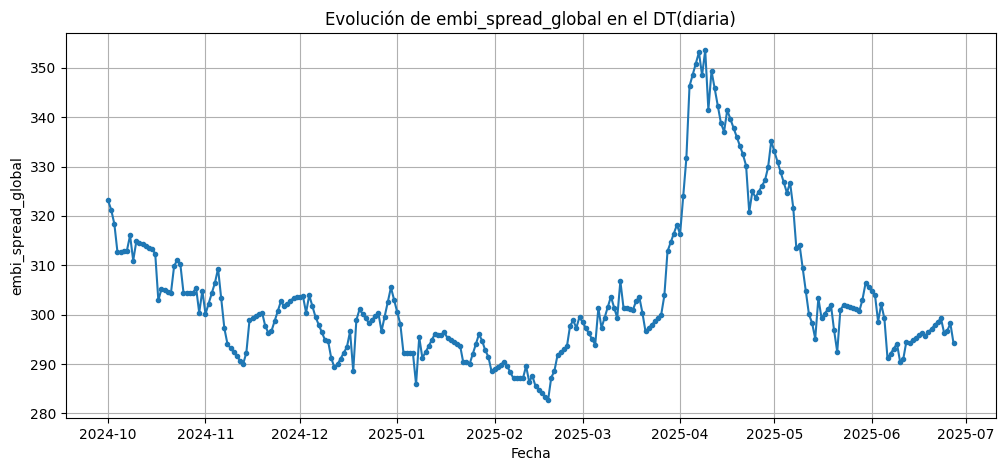

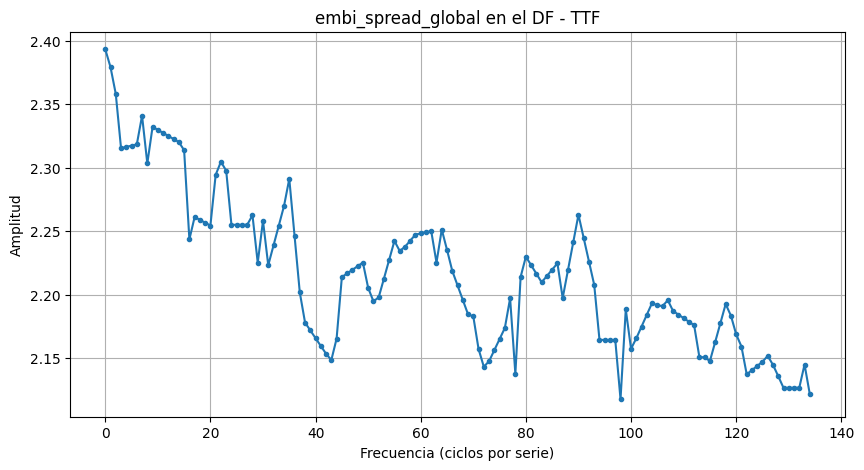

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\4057922164.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


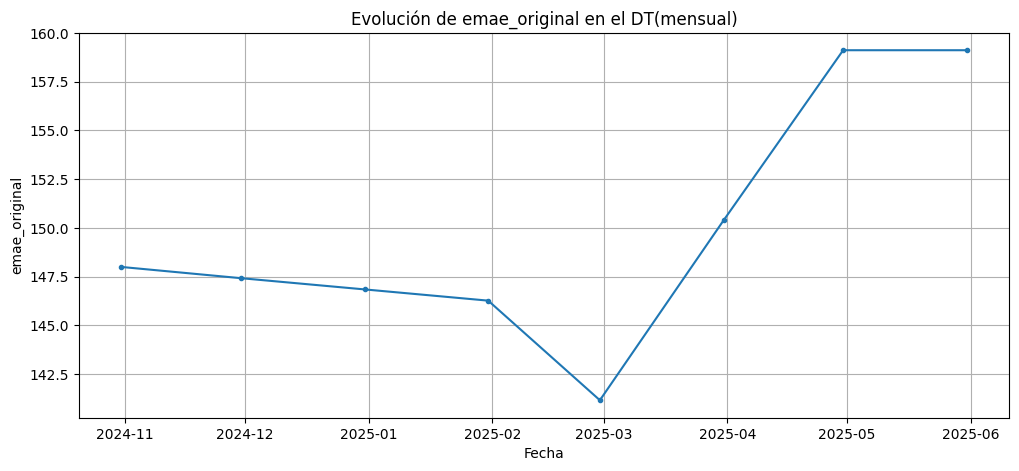

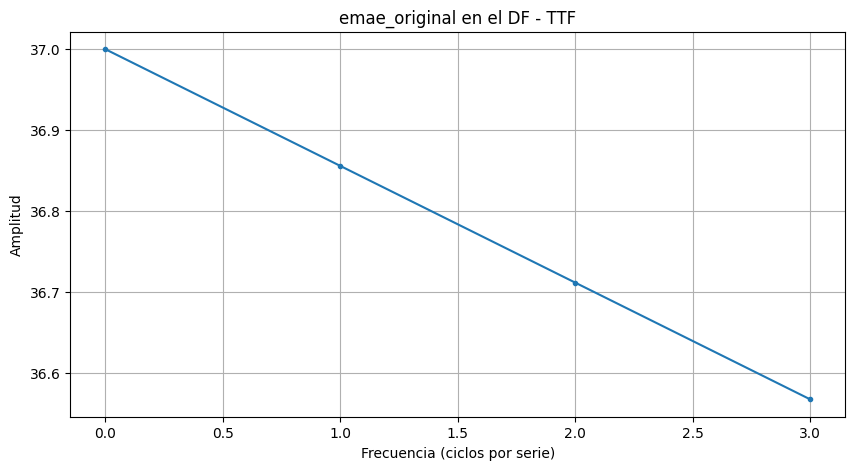

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\4057922164.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


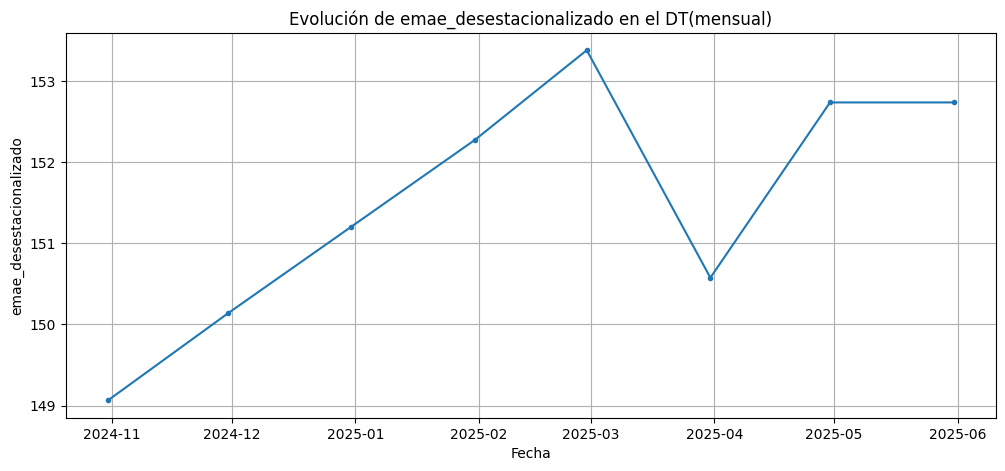

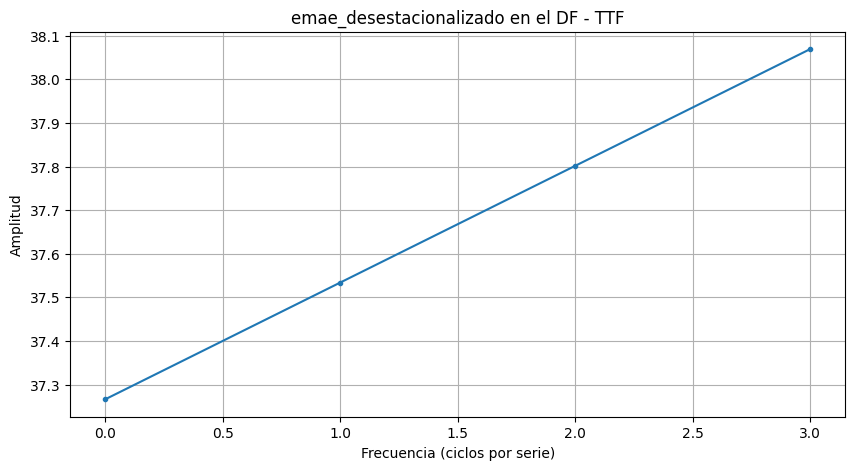

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\4057922164.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


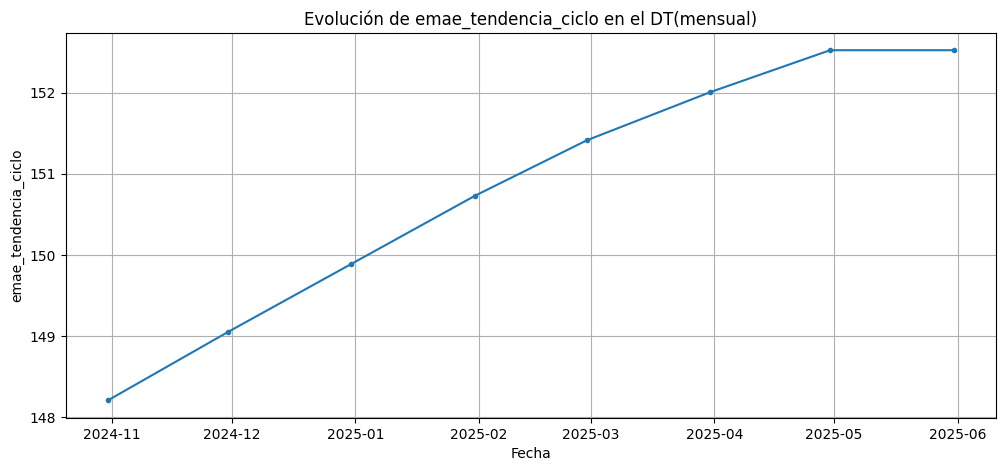

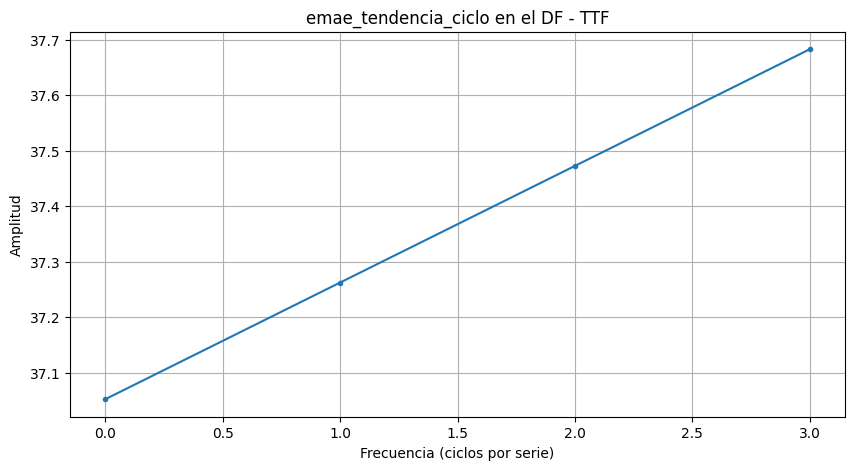

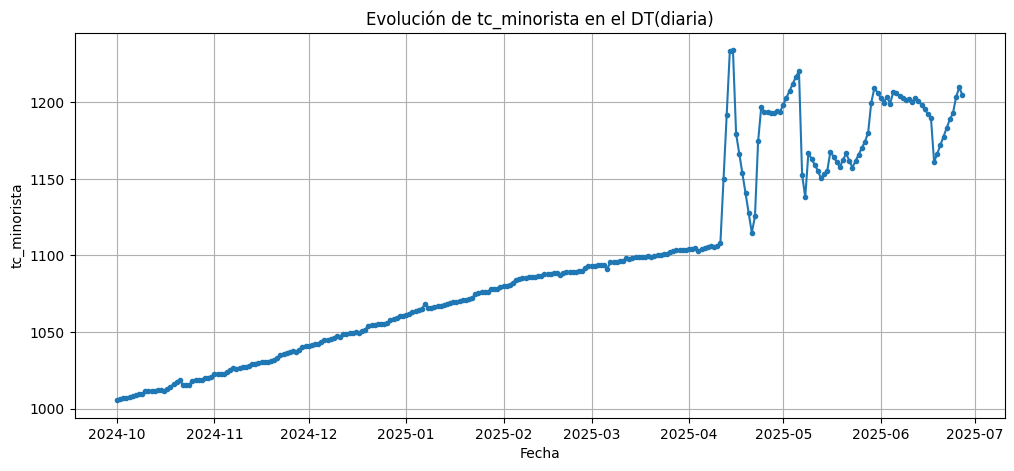

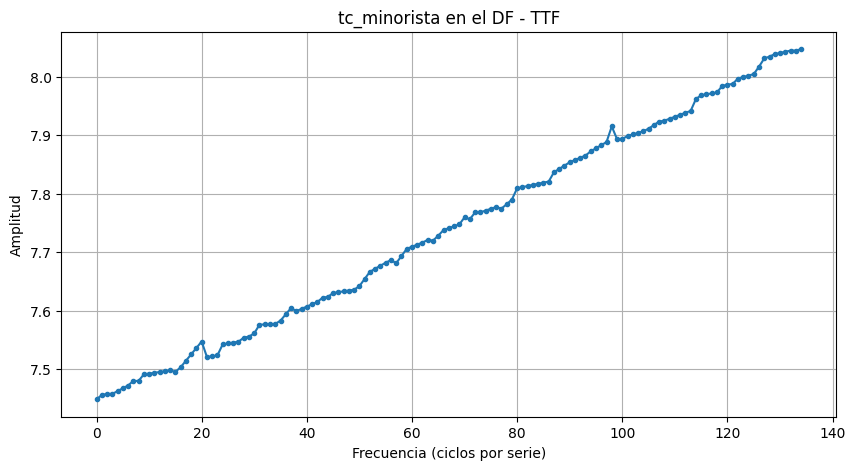

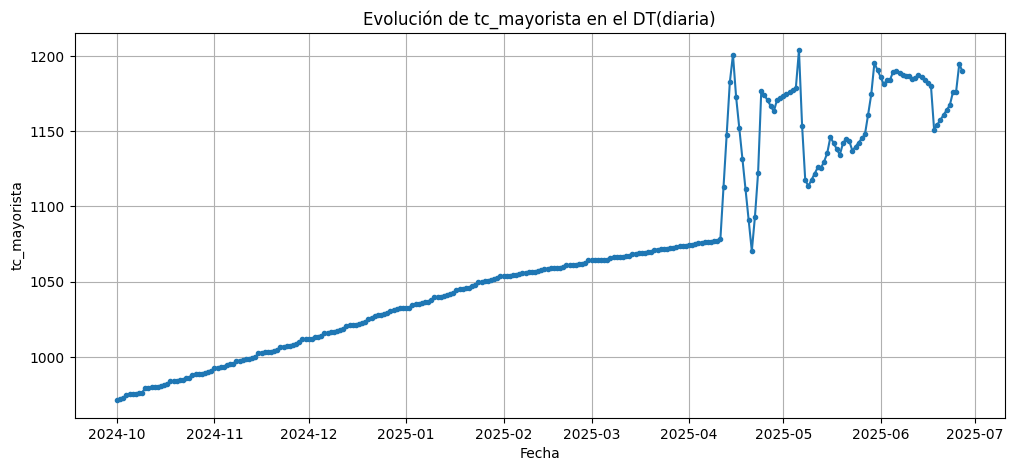

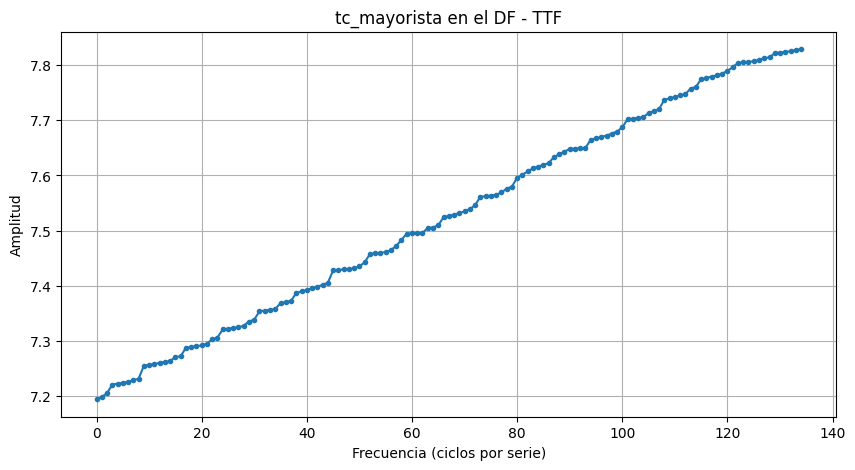

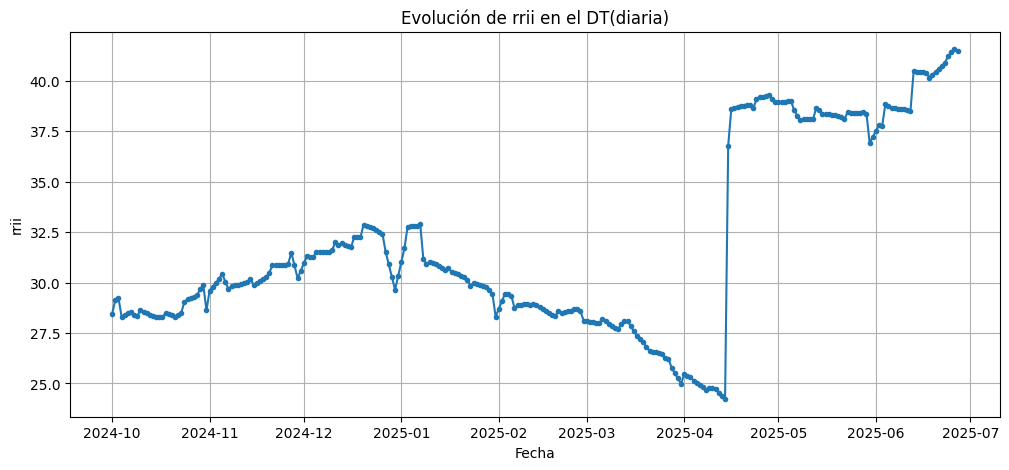

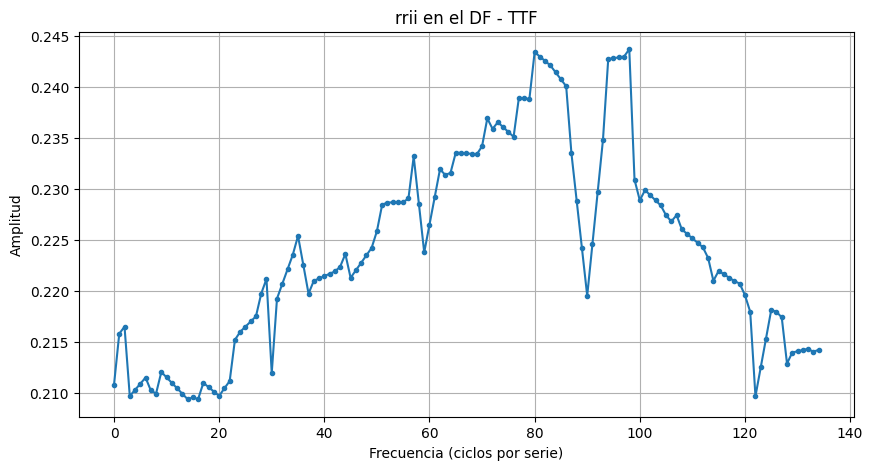

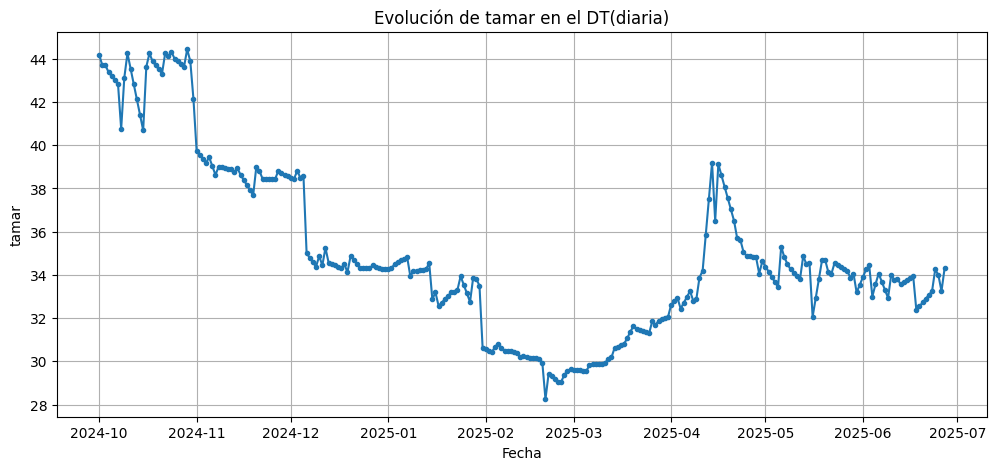

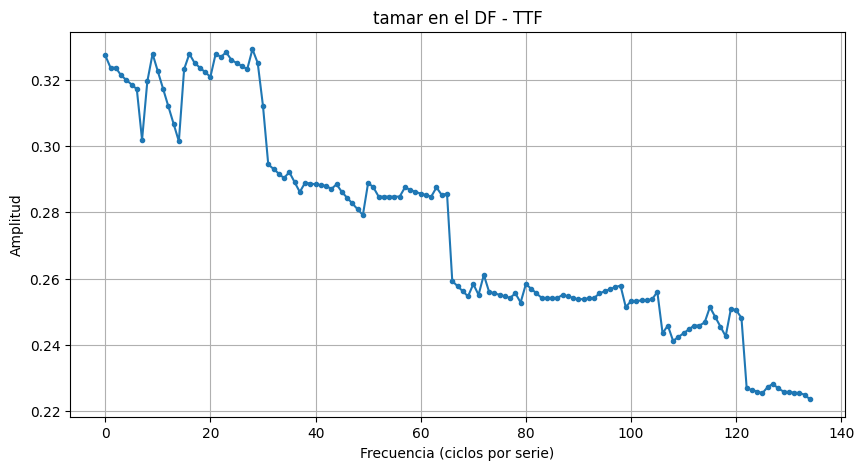

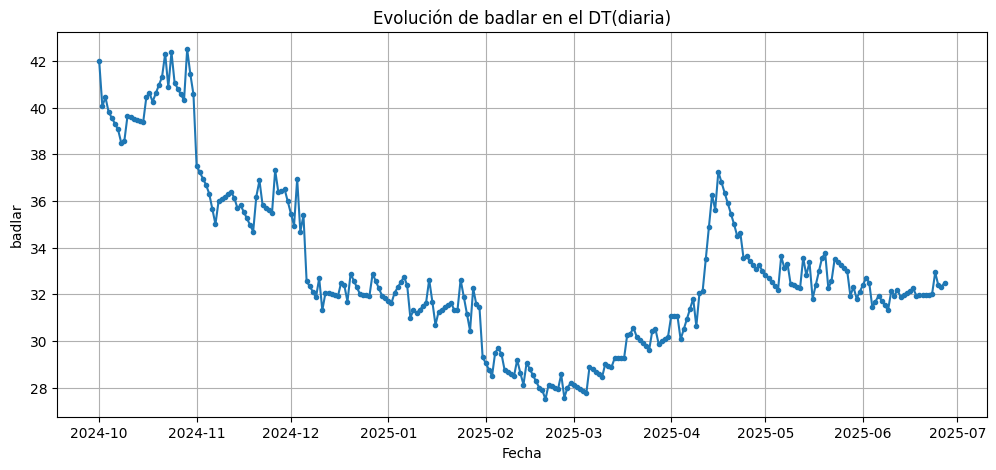

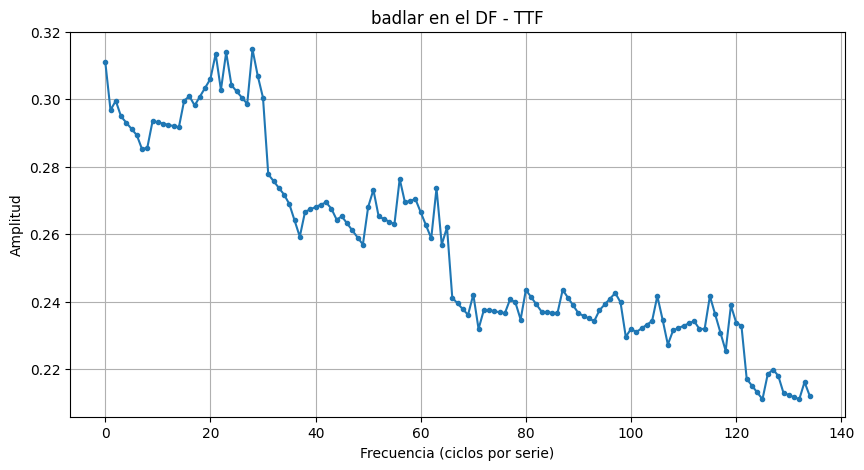

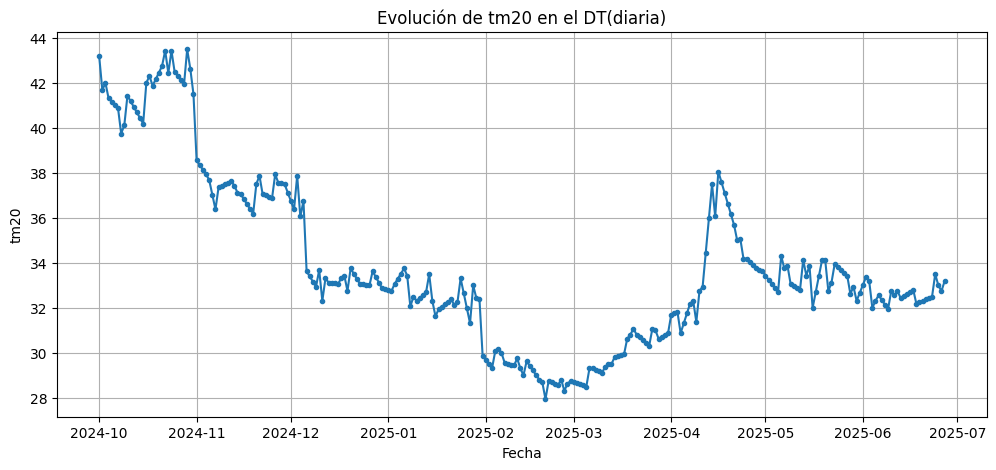

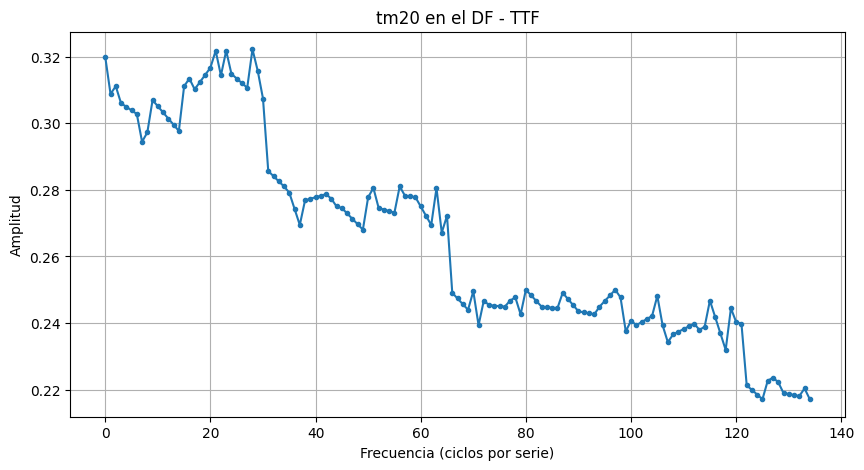

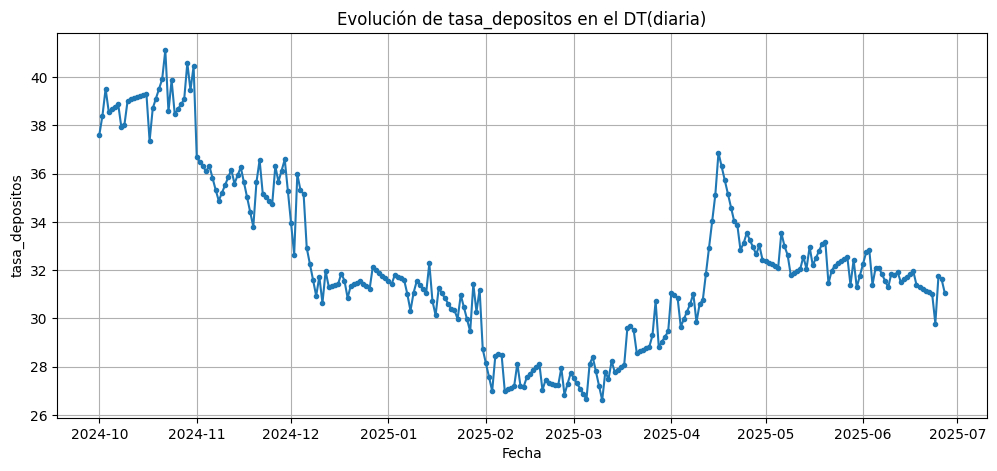

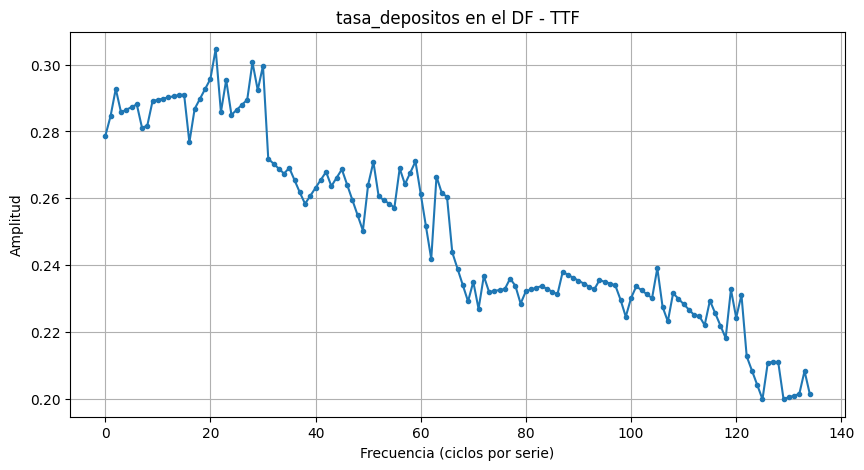

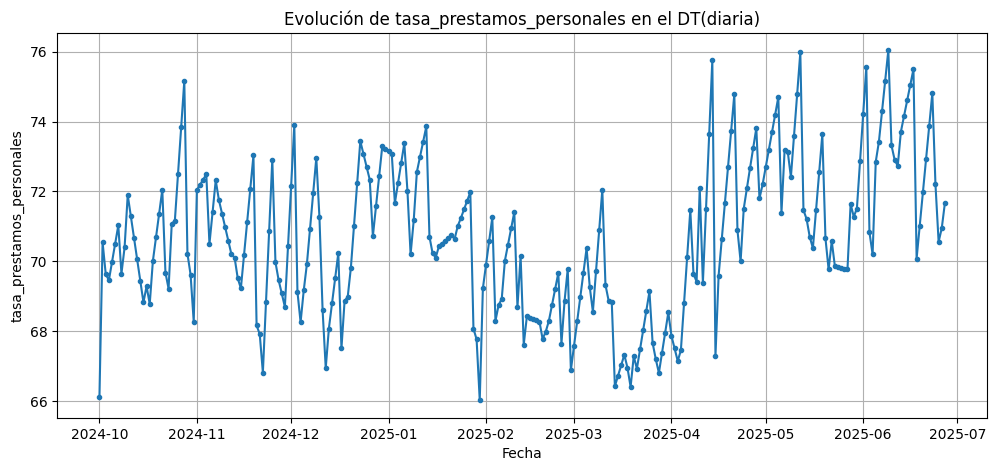

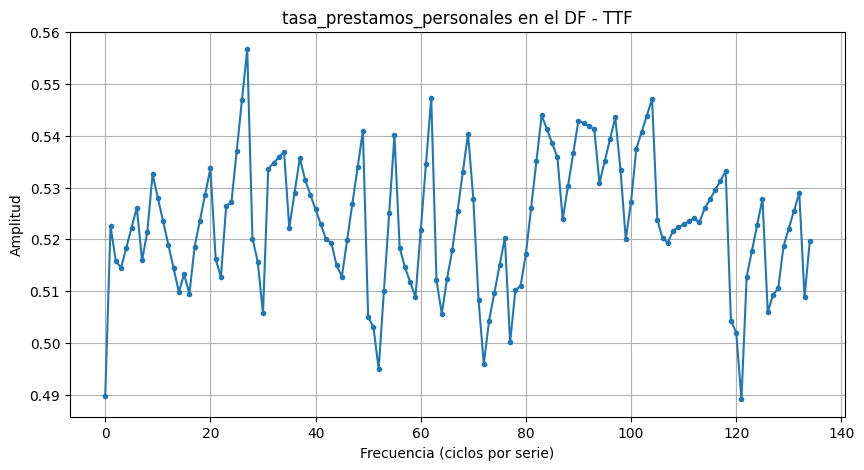

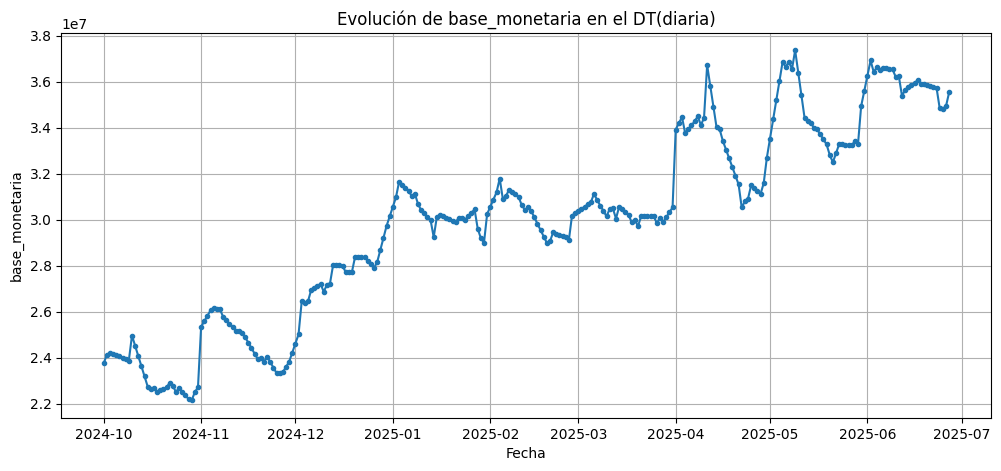

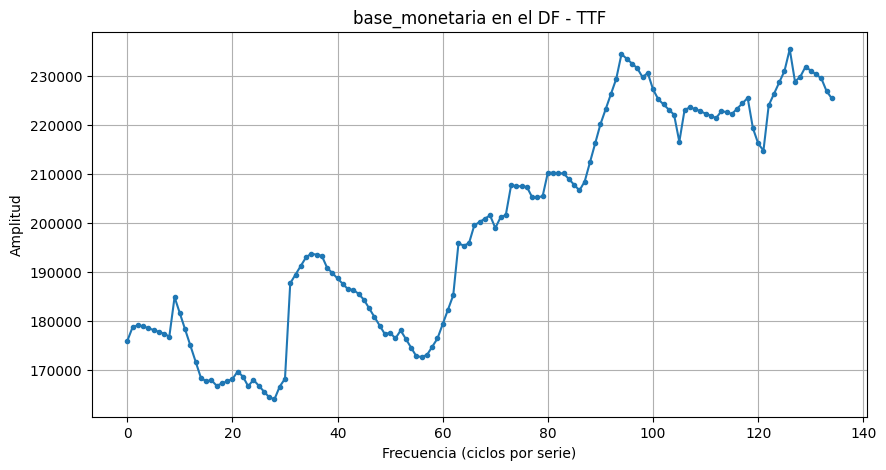

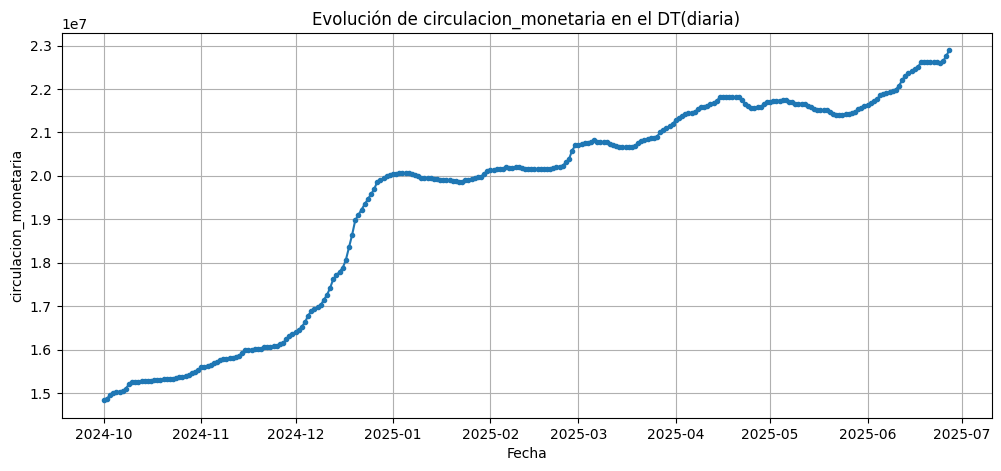

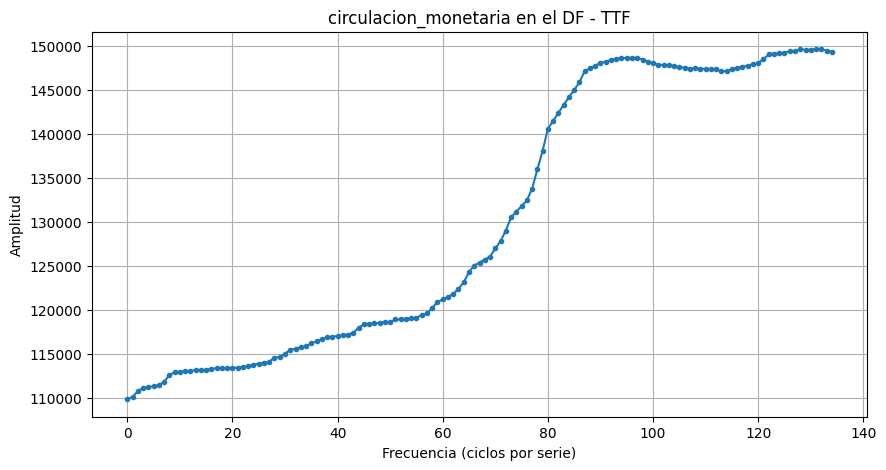

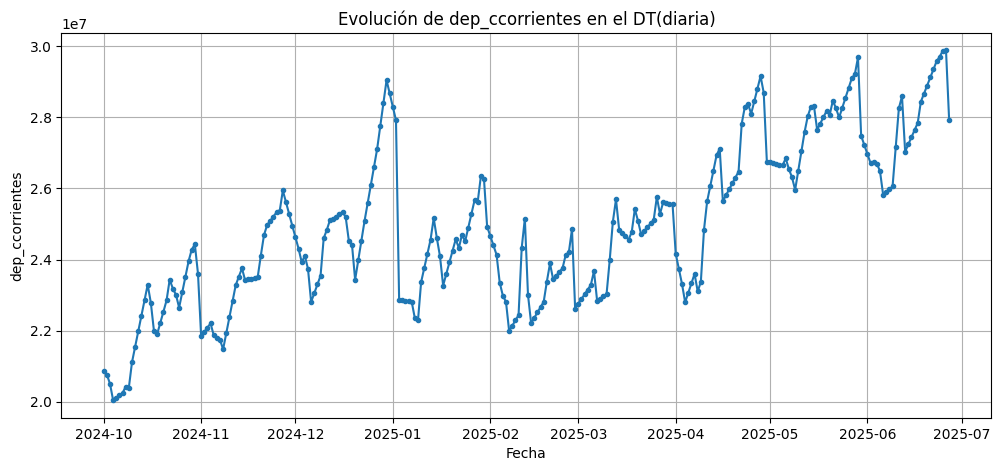

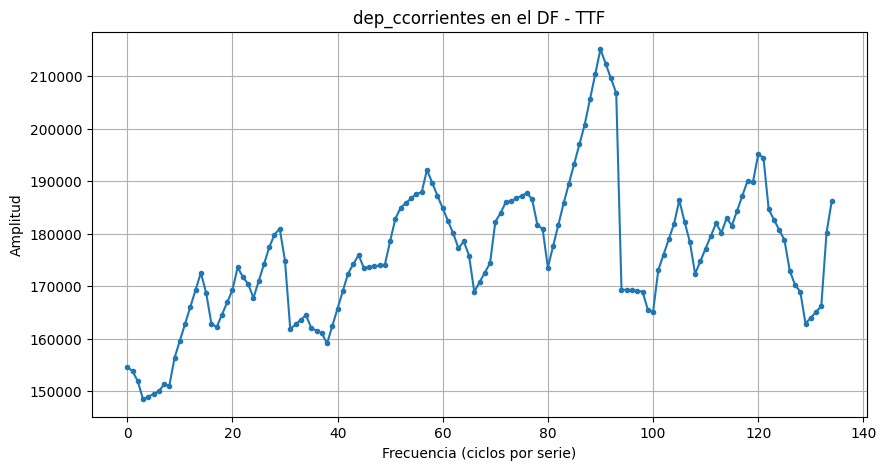

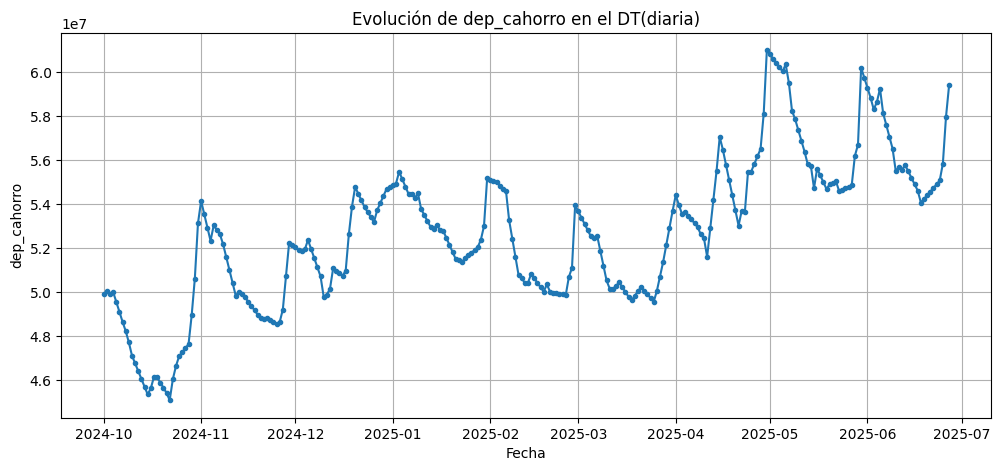

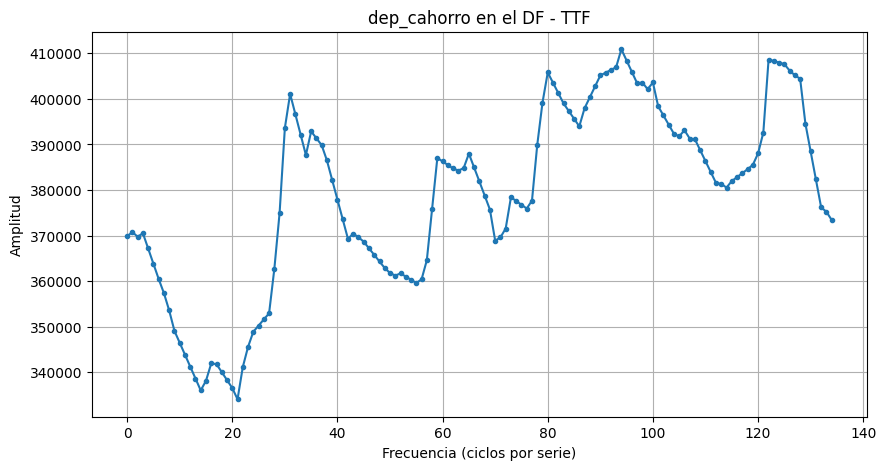

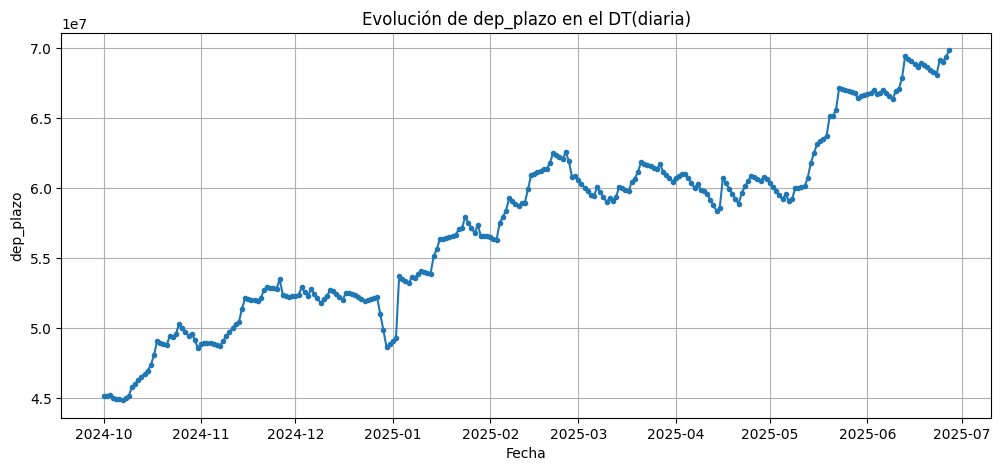

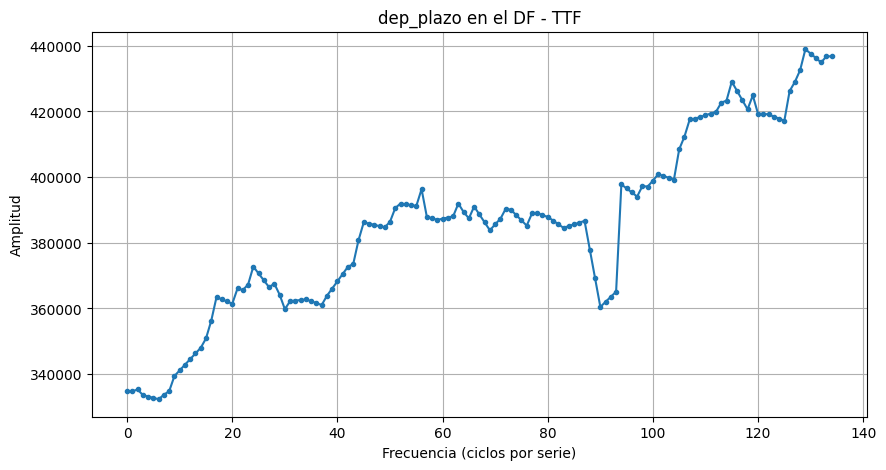

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\4057922164.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


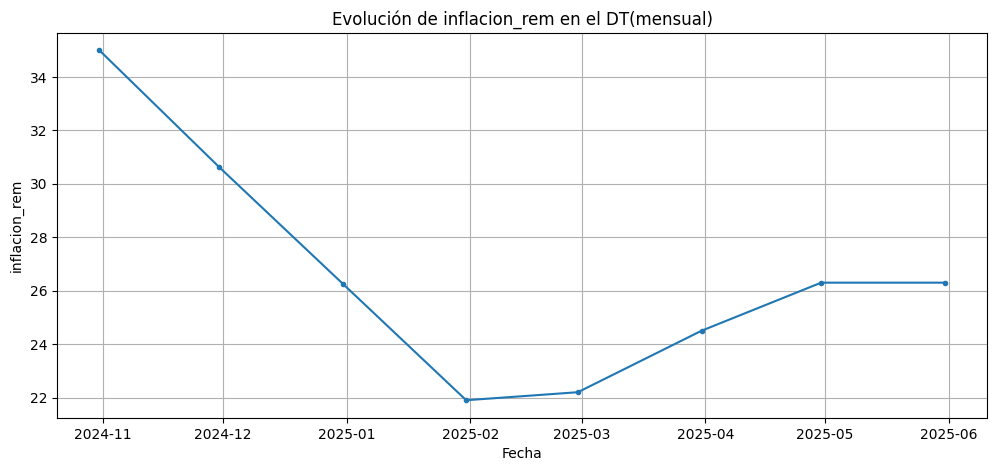

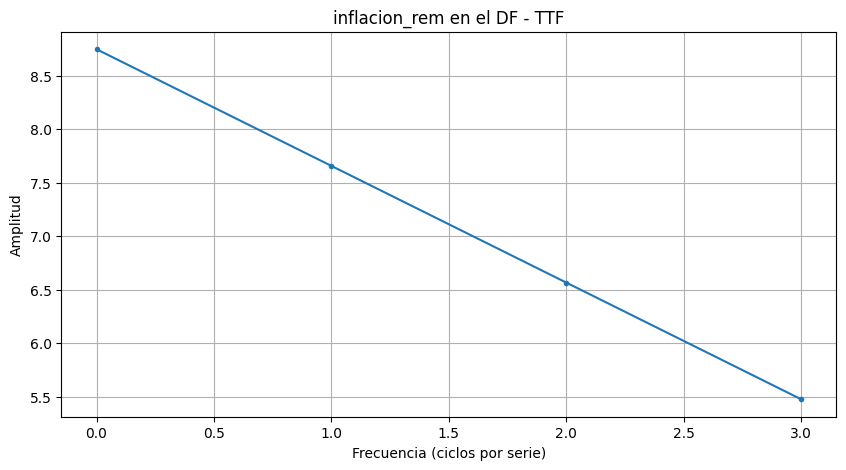

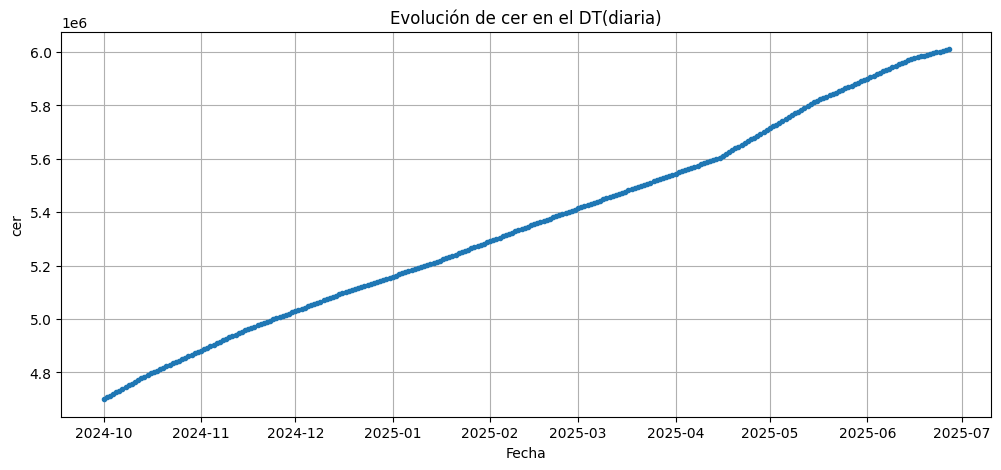

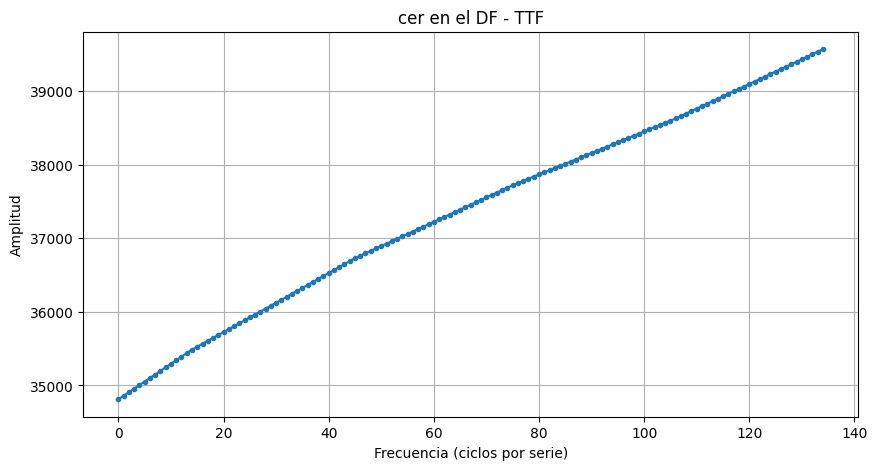

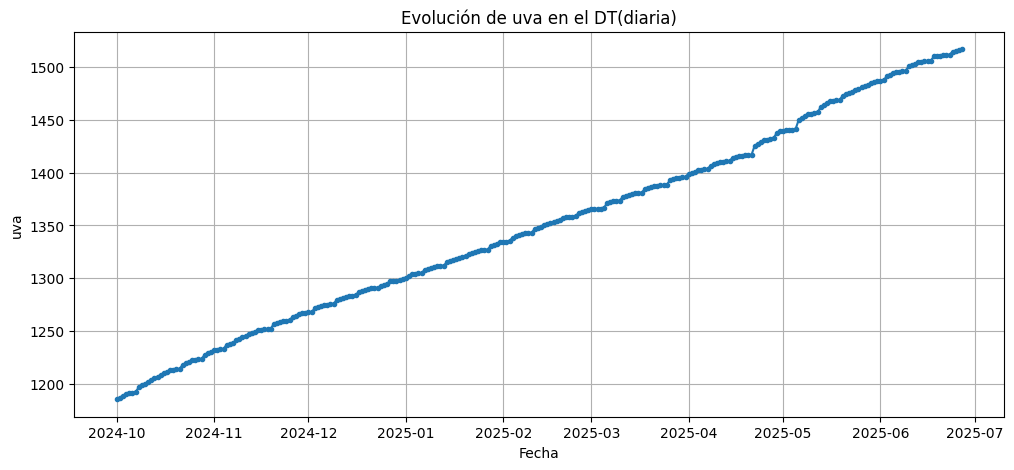

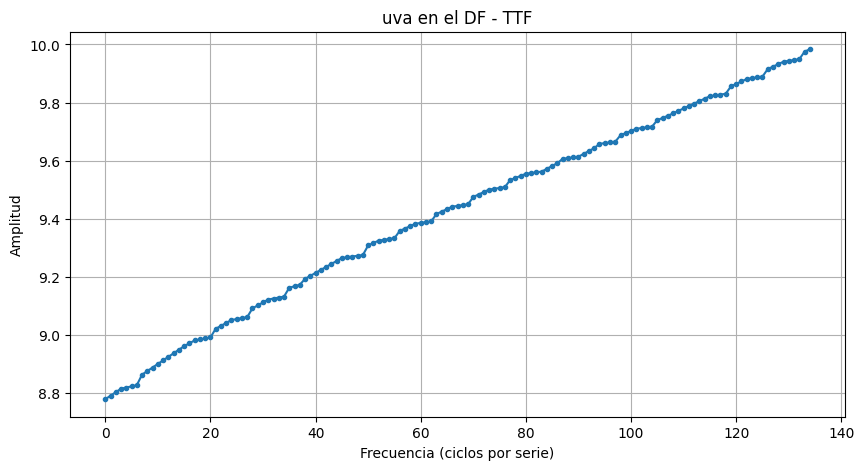

In [18]:
#1. Iteramos sobre cada variable del diccionario para saber la frecuencia.
for _, row in diccionario.iterrows():
    var = row['serie']
    freq = row['frecuencia']  # 'diaria' o 'mensual'
    
    #2. Extramos los datos de la serie de dicha variable, en series_temporales.
    y = series_temporales[['fecha', var]].copy()
    y = y.set_index('fecha')
    
    #3. Reindexamos para que no haya "huecos" entre las fechas ----> Las ST para que funcione la TTF requiere que el delta t de las muestras sea constante.
    if freq == 'diaria':
        y = y.asfreq('D')
        d = 1   # 1 día entre muestras.
    elif freq == 'mensual':
        y = y.asfreq('M')
        d = 30  # aprox 30 días entre muestras.
    
    #4. Rellenamos los nulos con el método lineal (por falta de dato o a propósito para convertilo en una ST).
    y_filled = y.interpolate(method='linear')
    
    #5. Graficamos la serie temporal en el dominio del tiempo.
    plt.figure(figsize=(12,5))
    plt.plot(y_filled.index, y_filled[var], marker='.')
    plt.title(f"Evolución de {var} en el DT({freq})")
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()
    
    #6. Calculamos la Transformada de Fourier (FFT).
    N = len(y_filled)
    freq_per_cycle = np.arange(N//2)

    yf = np.fft.fft(y_filled)
    amplitud = 2.0/N * np.abs(yf[:N//2])
    
    #7. Graficar magnitud vs frecuencia
    plt.figure(figsize=(10,5))
    plt.plot(freq_per_cycle, amplitud, marker='.')
    plt.xlabel("Frecuencia (ciclos por serie)")
    plt.ylabel("Amplitud")
    plt.title(f"{var} en el DF - TTF")
    plt.grid(True)
    plt.show()

#### E. Analizo la autocorrelación de las ST.
- Método para entender si tienen frecuencias altas o es "ruido".
- En caso de tener "ruido", puedo aplicar algún filtro "pasa bajos", para eliminarlo.
- ¿Cómo identificar el "ruido?
    * La ACF será prácticamente cero para todos los lags distintos de 0.
    * Solo se verá un pico en lag 0 y luego nada significativo (pequeñas fluctuaciones aleatorias alrededor de cero).
    * Si todos están dentro de los intervalos de confianza (normalmente ±1.96/√N), significa que no hay correlación significativa → mucho ruido.
    * Si algunos lags están fuera del intervalo de confianza, hay señal estructurada → menos ruido.

- Tip visual:
    * Un pico solo en lag 0 y todo lo demás casi en cero → ruido.
    * Picos periódicos o decrecientes → hay estructura (tendencia, estacionalidad, autocorrelación real).

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2773222333.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2773222333.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2773222333.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2773222333.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


<Figure size 1000x400 with 0 Axes>

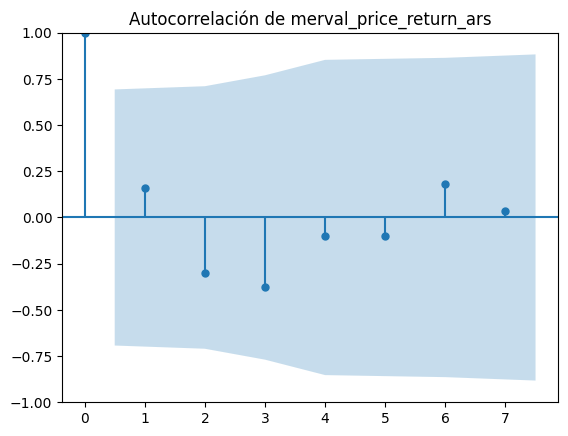

<Figure size 1000x400 with 0 Axes>

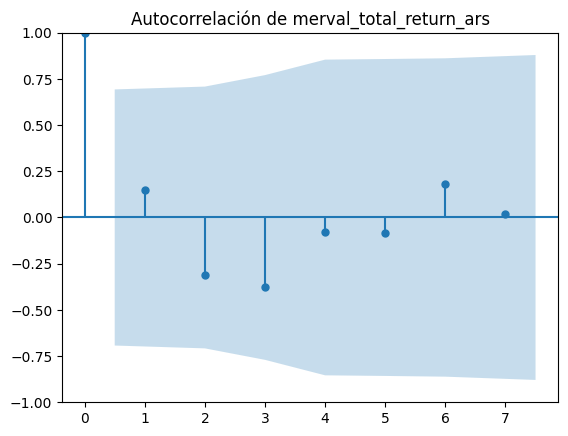

<Figure size 1000x400 with 0 Axes>

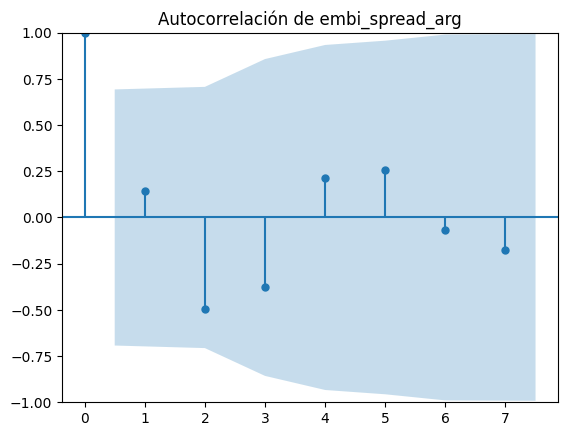

<Figure size 1000x400 with 0 Axes>

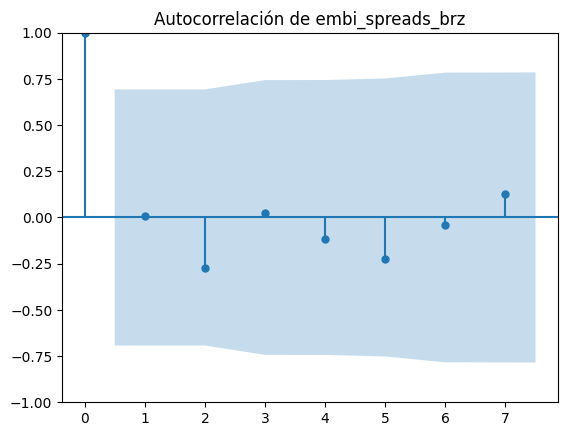

<Figure size 1000x400 with 0 Axes>

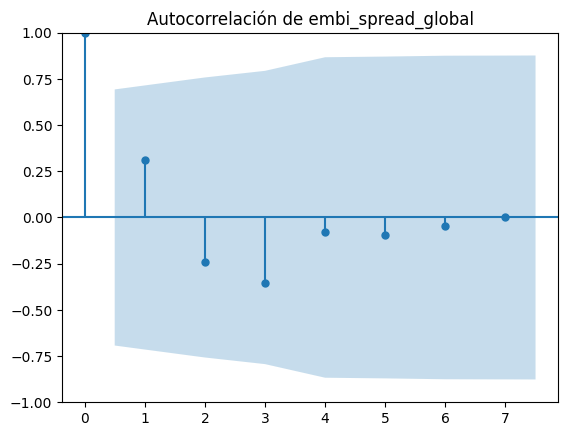

<Figure size 1000x400 with 0 Axes>

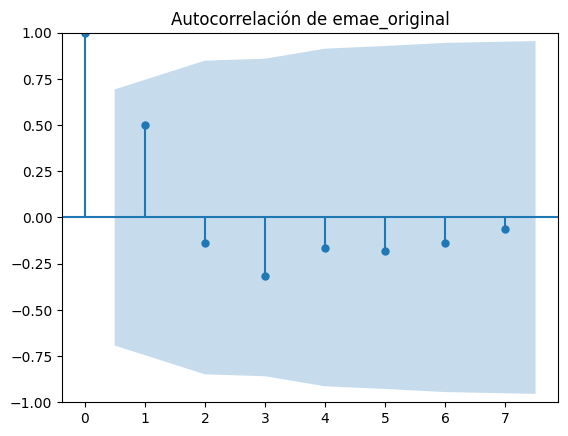

<Figure size 1000x400 with 0 Axes>

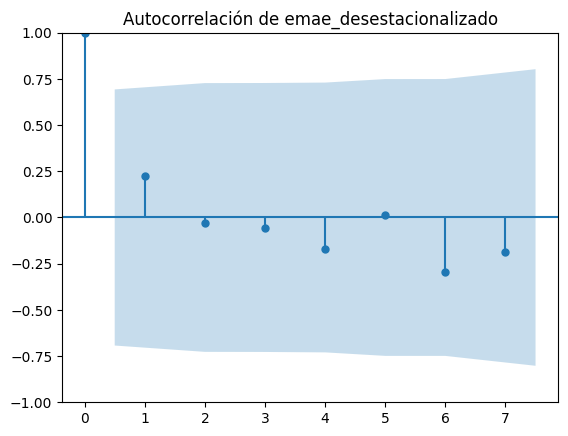

<Figure size 1000x400 with 0 Axes>

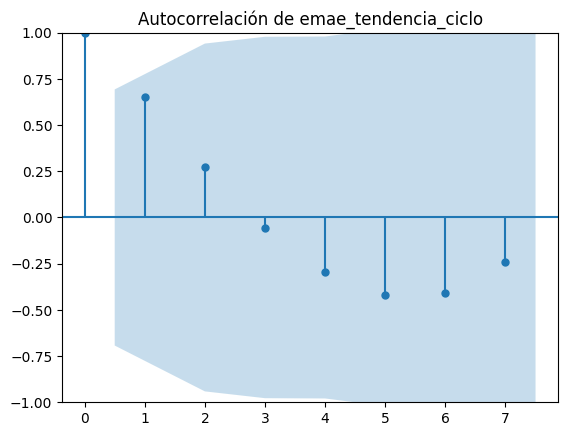

<Figure size 1000x400 with 0 Axes>

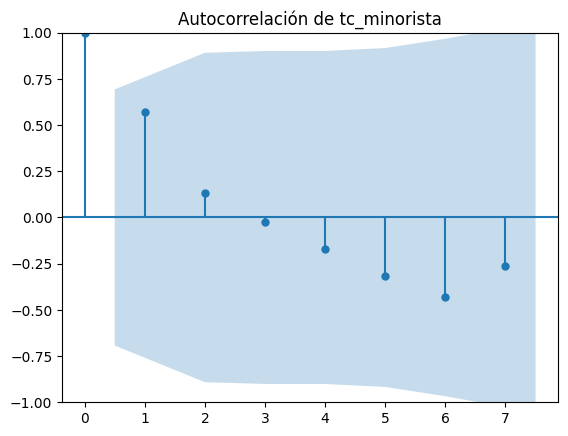

<Figure size 1000x400 with 0 Axes>

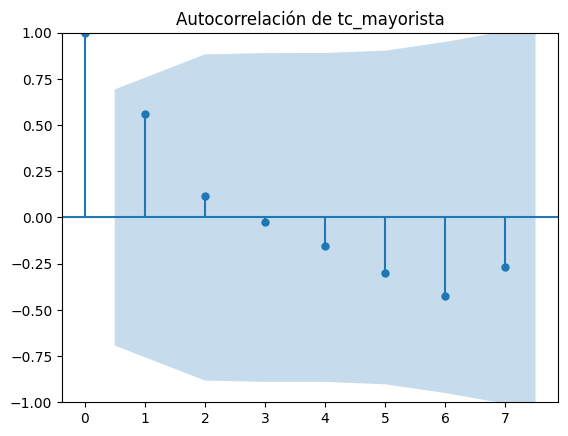

<Figure size 1000x400 with 0 Axes>

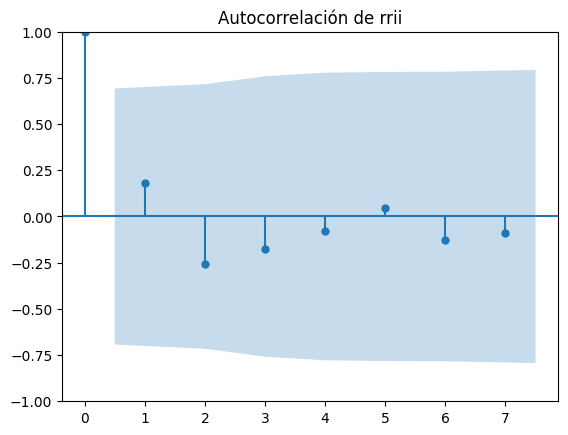

<Figure size 1000x400 with 0 Axes>

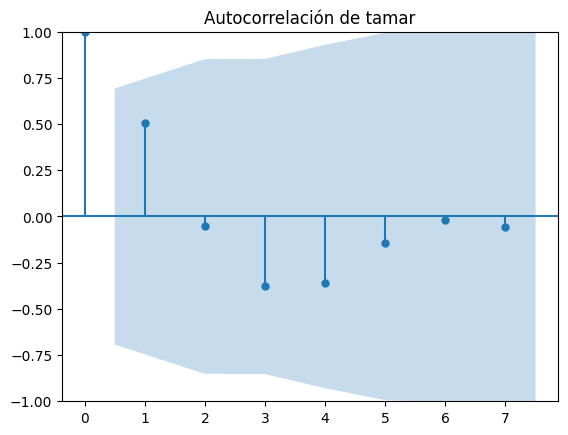

<Figure size 1000x400 with 0 Axes>

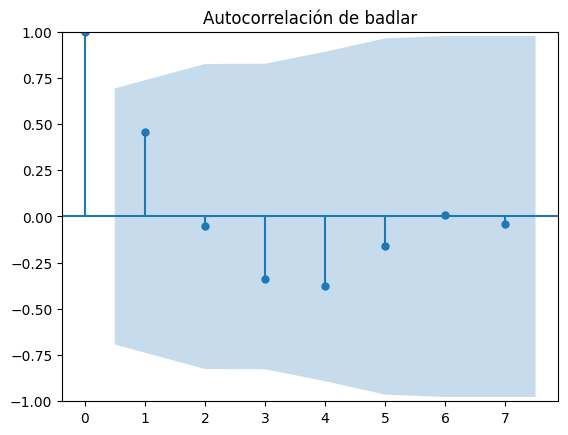

<Figure size 1000x400 with 0 Axes>

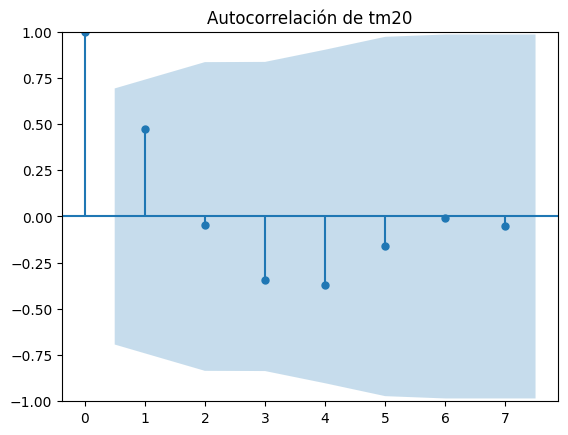

<Figure size 1000x400 with 0 Axes>

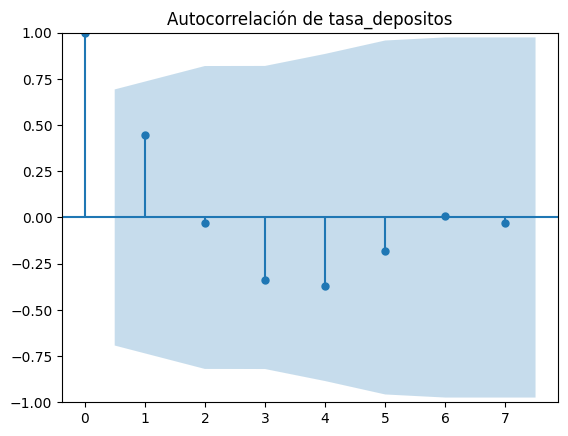

<Figure size 1000x400 with 0 Axes>

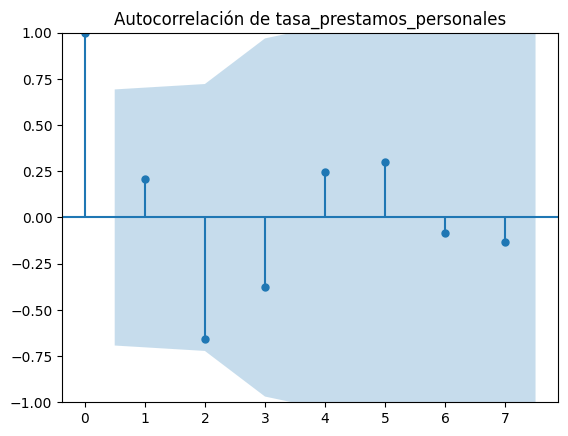

<Figure size 1000x400 with 0 Axes>

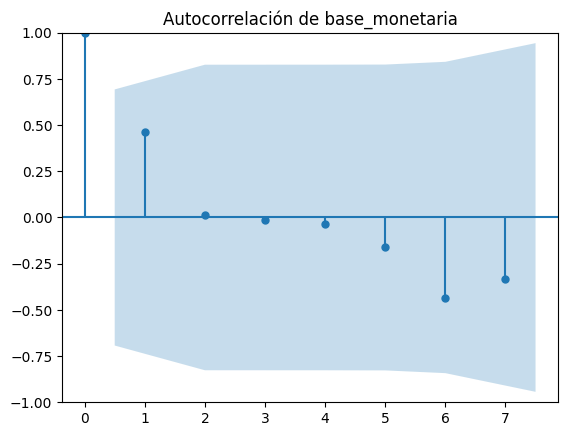

<Figure size 1000x400 with 0 Axes>

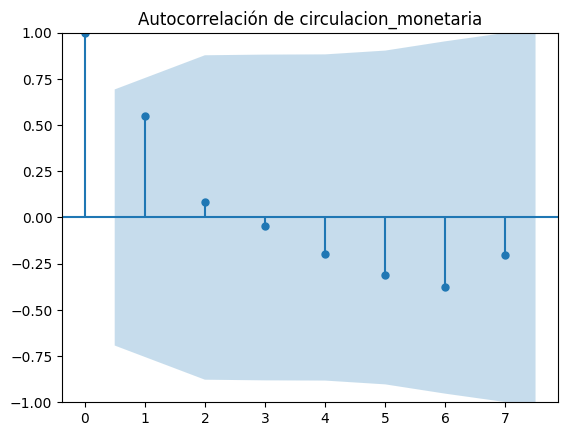

<Figure size 1000x400 with 0 Axes>

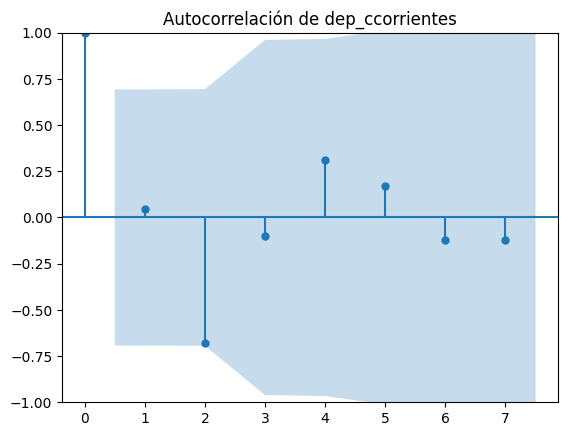

<Figure size 1000x400 with 0 Axes>

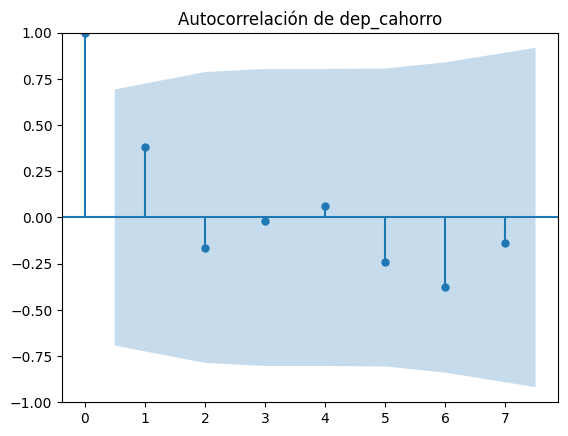

<Figure size 1000x400 with 0 Axes>

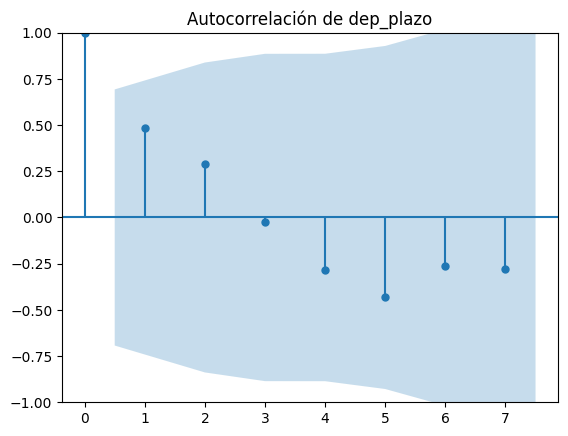

<Figure size 1000x400 with 0 Axes>

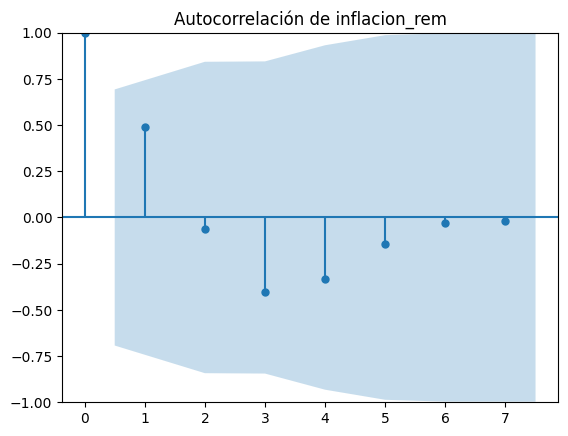

<Figure size 1000x400 with 0 Axes>

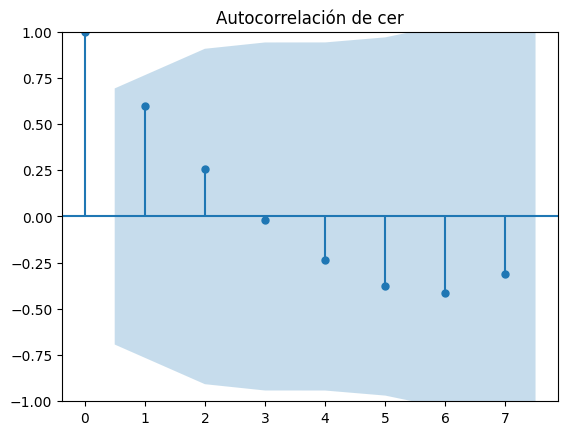

<Figure size 1000x400 with 0 Axes>

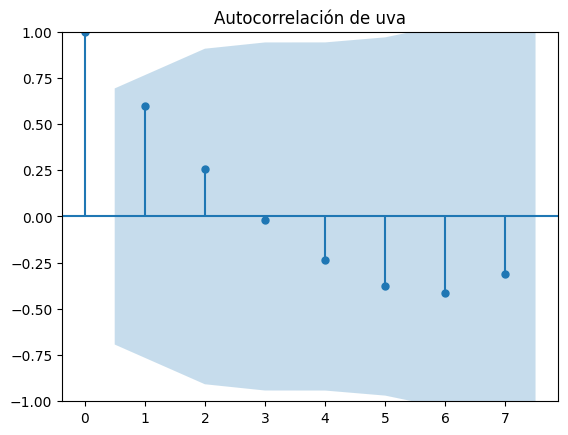

In [19]:
#1. Interpolo las series temporales.
series_interpoladas = {}

for _, row in diccionario.iterrows():
    var = row['serie']
    freq_type = row['frecuencia']  # 'diaria' o 'mensual'
    
    #a. Extraigo la serie
    y = series_temporales[['fecha', var]].copy().set_index('fecha')
    
    #b. Reindexo según la frecuencia
    if freq_type == 'diaria':
        y = y.asfreq('D')
    elif freq_type == 'mensual':
        y = y.asfreq('M')
    
    #c. Interpolación lineal
    y_filled = y.interpolate(method='linear')
    
    #d. Guardo la serie interpolada
    series_interpoladas[var] = y_filled[var]

#2. Combino todas las ST en un único DF.
df_all = pd.DataFrame(series_interpoladas)
df_all = df_all.dropna()  # elimino NA residuales.

#3. Calculo autocorrelaciones con lags.
for var in df_all.columns:
    serie = df_all[var]
    max_lags = min(30, len(serie)-1)  # lags no puede superar tamaño de la serie - 1
    if max_lags <= 0:
        print(f"No hay suficientes datos para {var}")
        continue
    
    plt.figure(figsize=(10,4))
    plot_acf(serie, lags=max_lags)
    plt.title(f"Autocorrelación de {var}")
    plt.show()

#### F. Correlación de todas las ST respecto al precio del Merval.

C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2527374329.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2527374329.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2527374329.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')
C:\Users\santt\AppData\Local\Temp\ipykernel_1220\2527374329.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = y.asfreq('M')


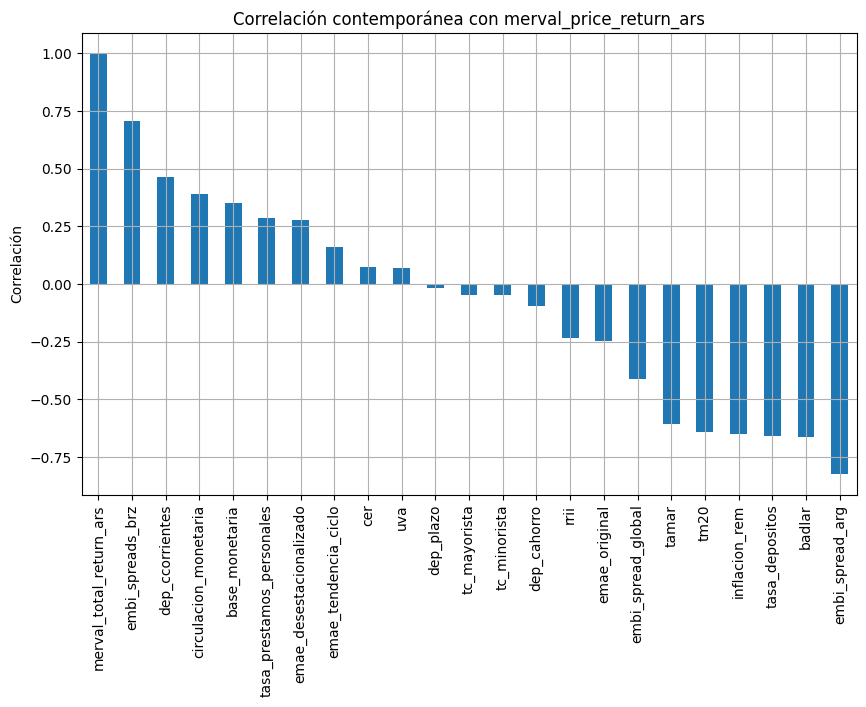

c:\Users\santt\Desktop\DataMining_UBA\5-series_temporales\series_temporales_2025\venv\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\santt\Desktop\DataMining_UBA\5-series_temporales\series_temporales_2025\venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\santt\Desktop\DataMining_UBA\5-series_temporales\series_temporales_2025\venv\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


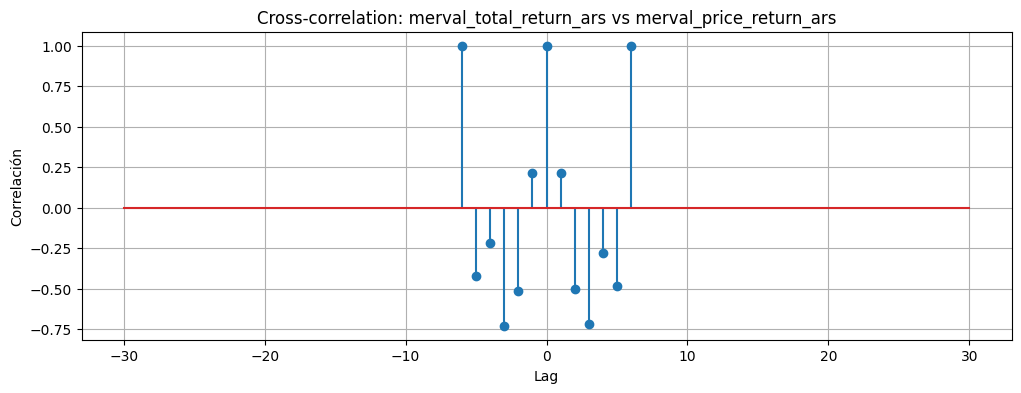

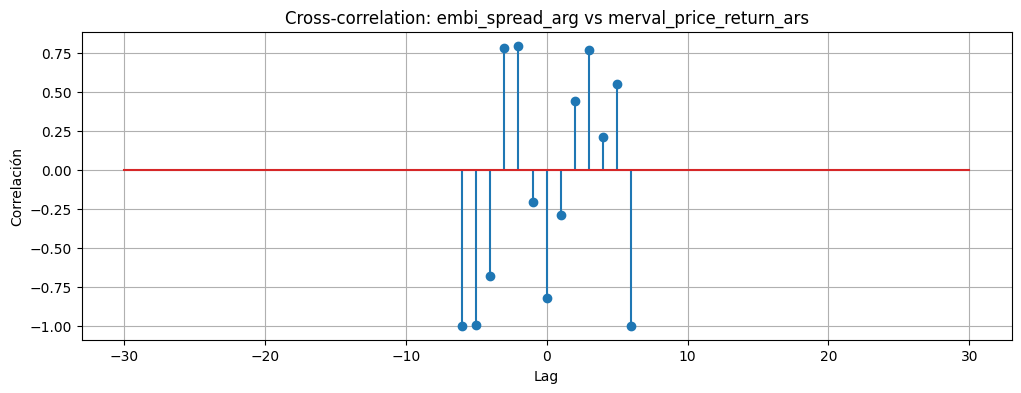

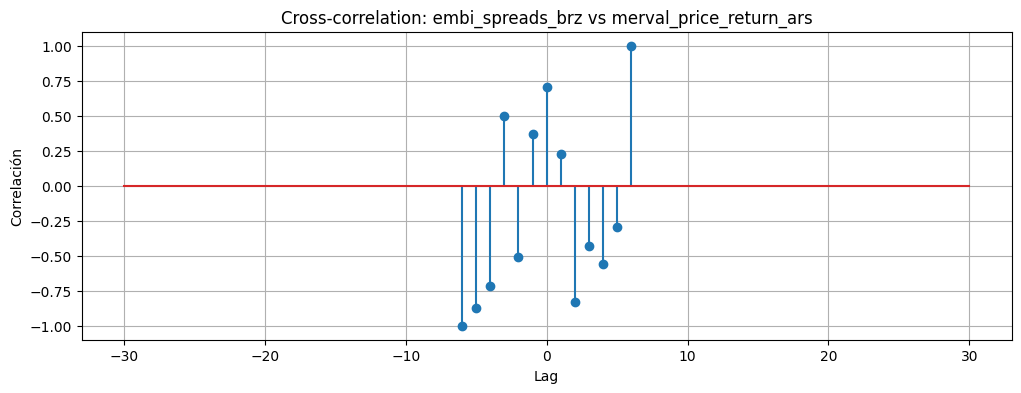

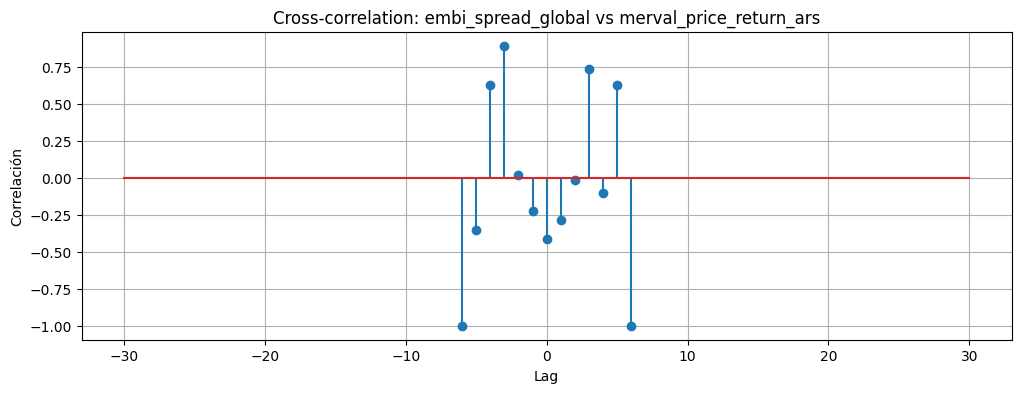

c:\Users\santt\Desktop\DataMining_UBA\5-series_temporales\series_temporales_2025\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\santt\Desktop\DataMining_UBA\5-series_temporales\series_temporales_2025\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


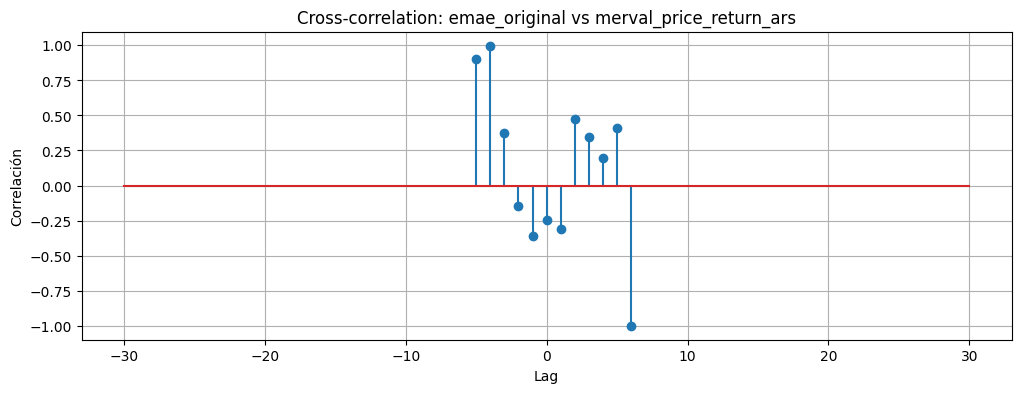

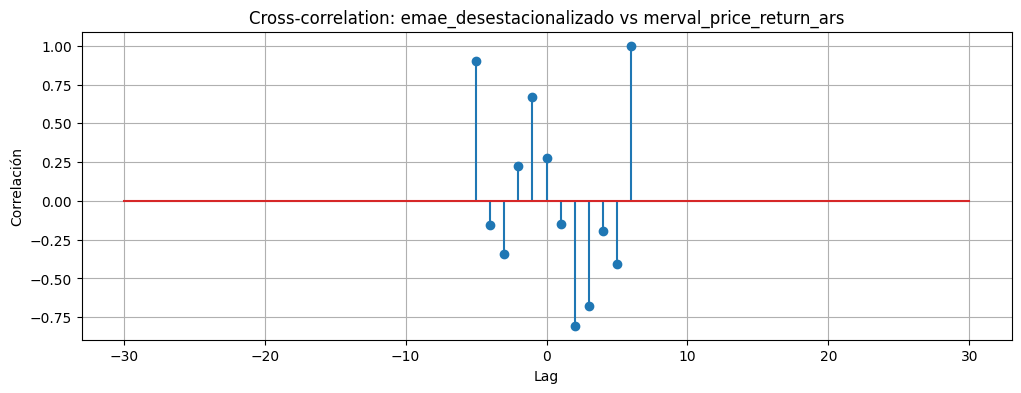

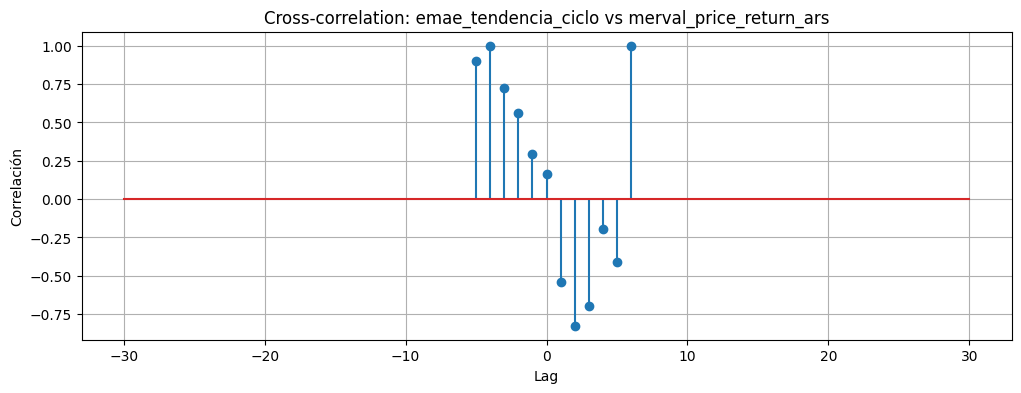

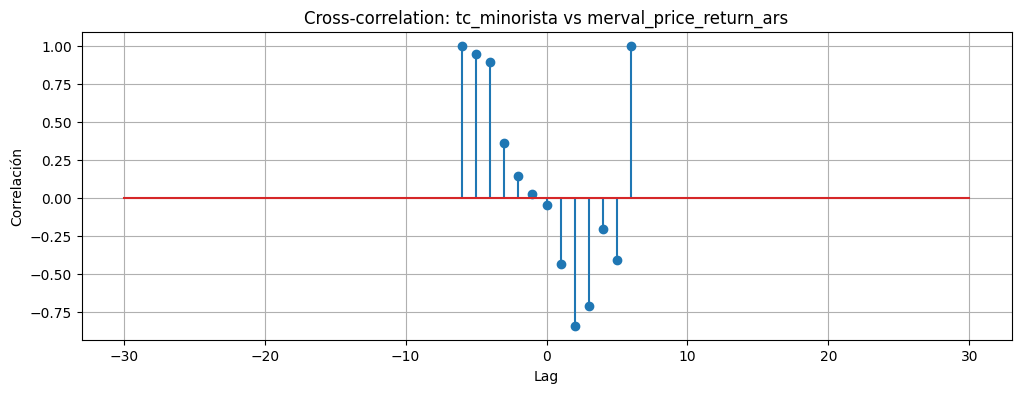

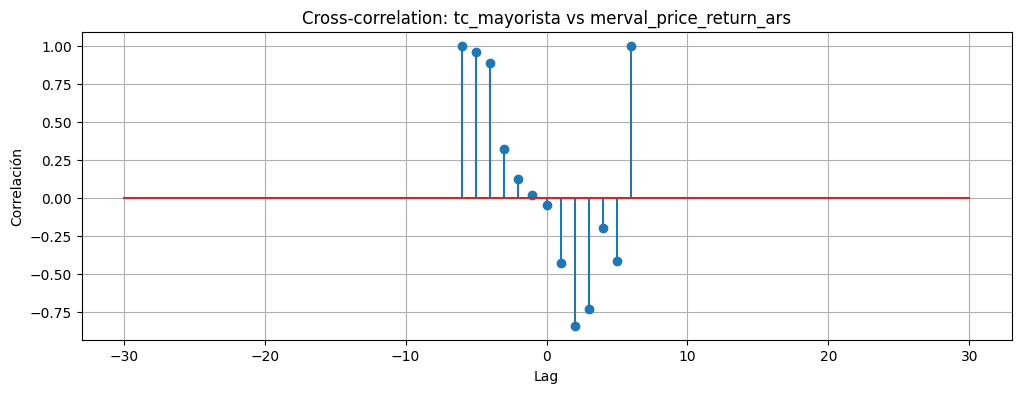

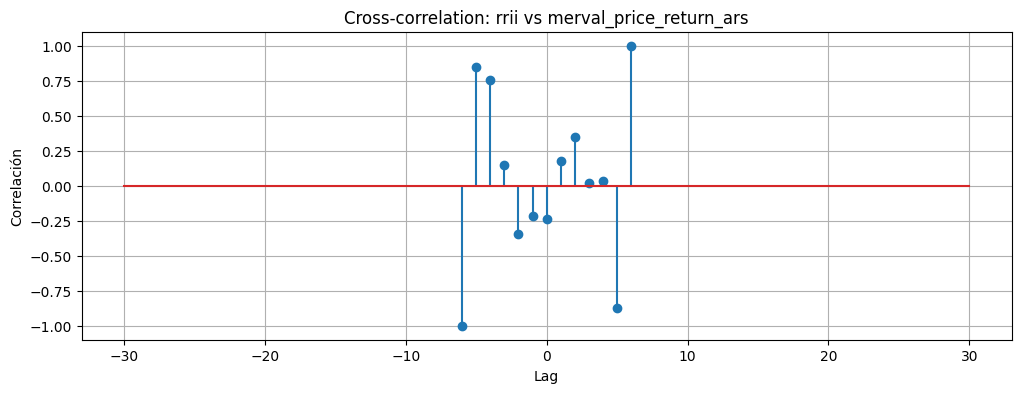

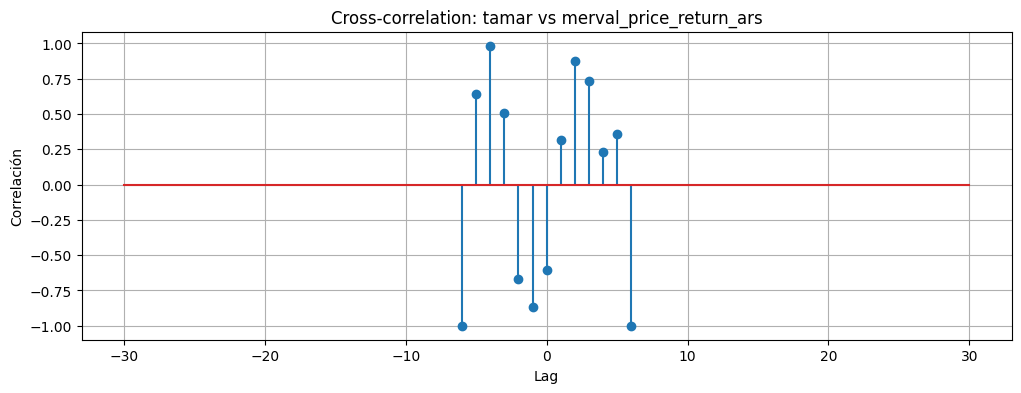

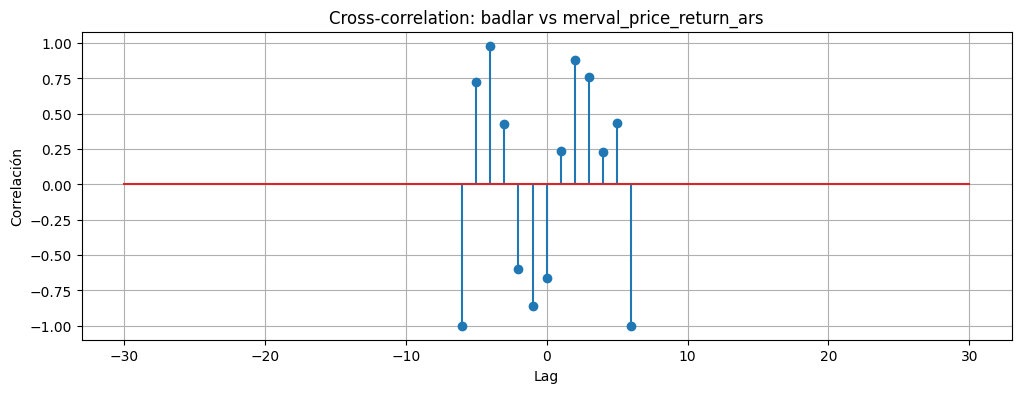

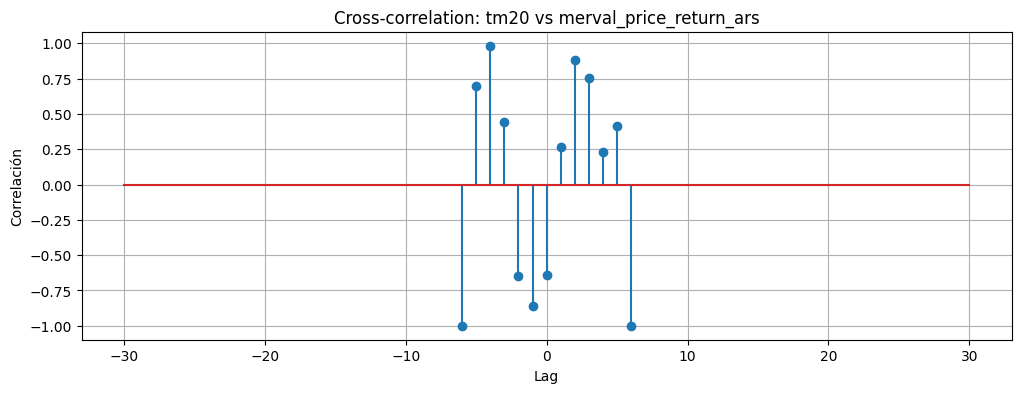

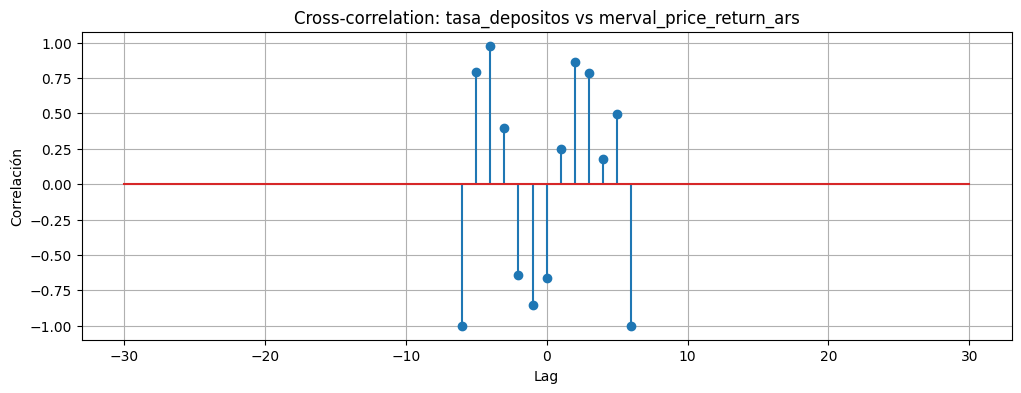

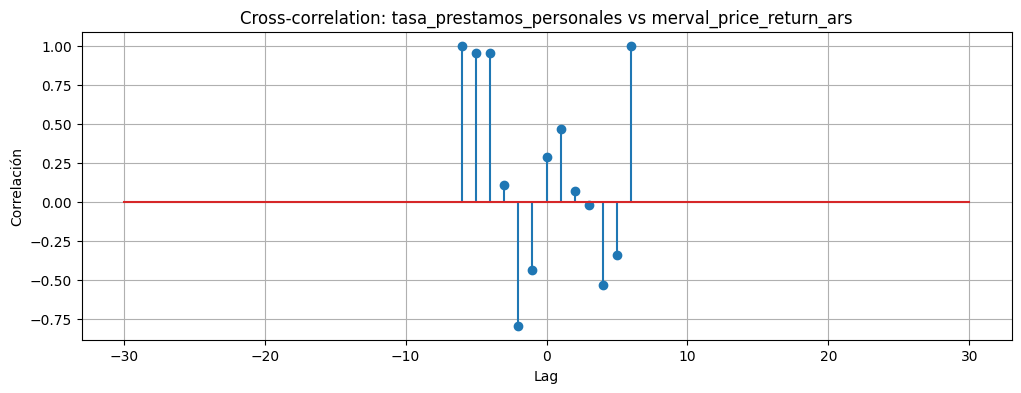

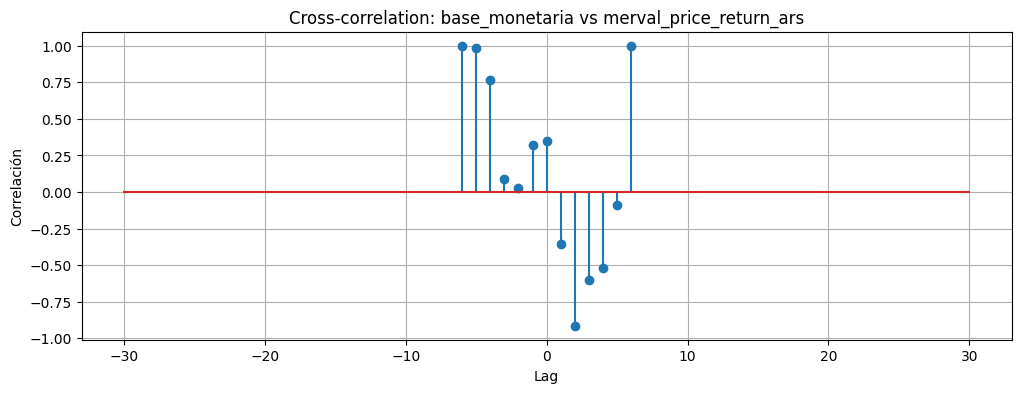

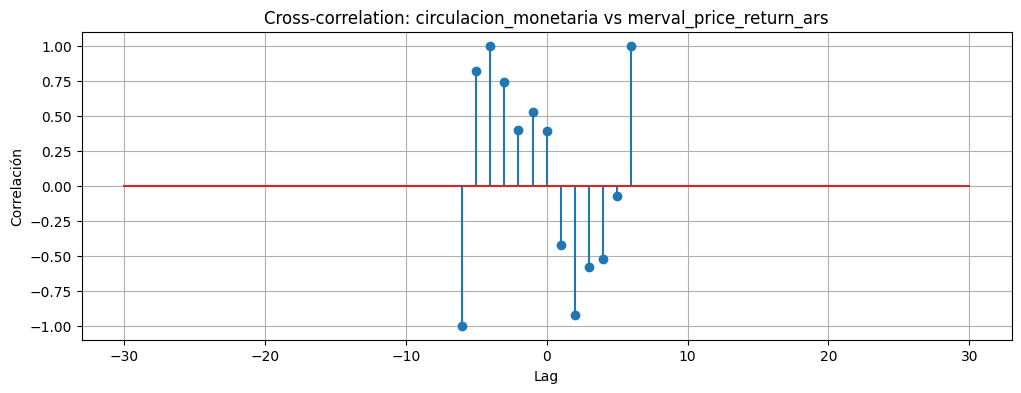

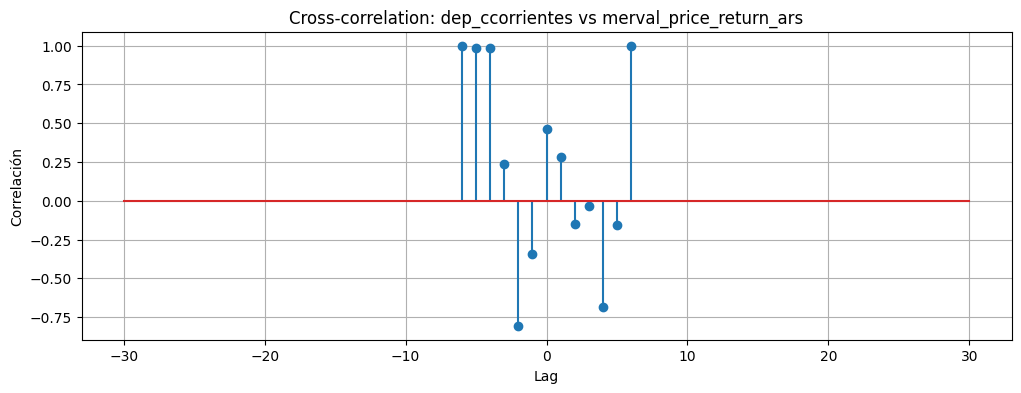

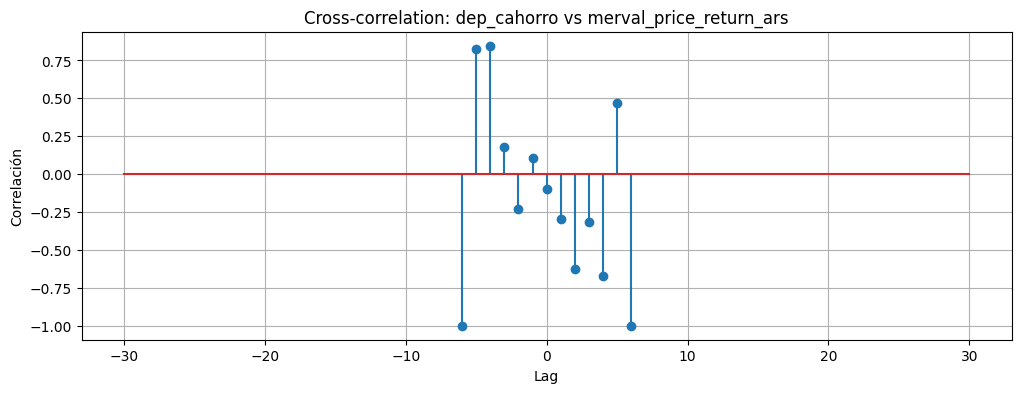

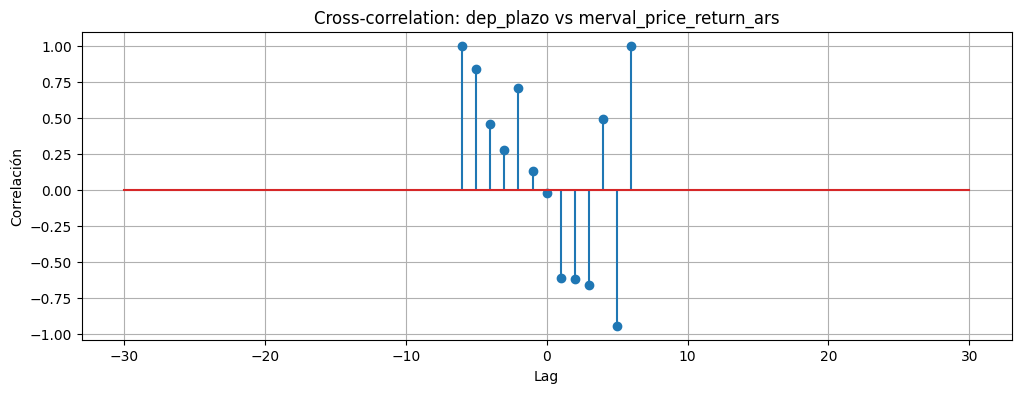

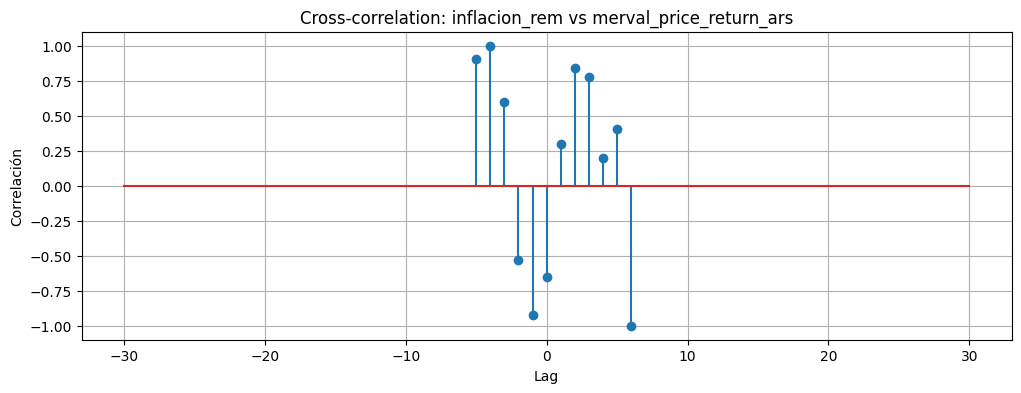

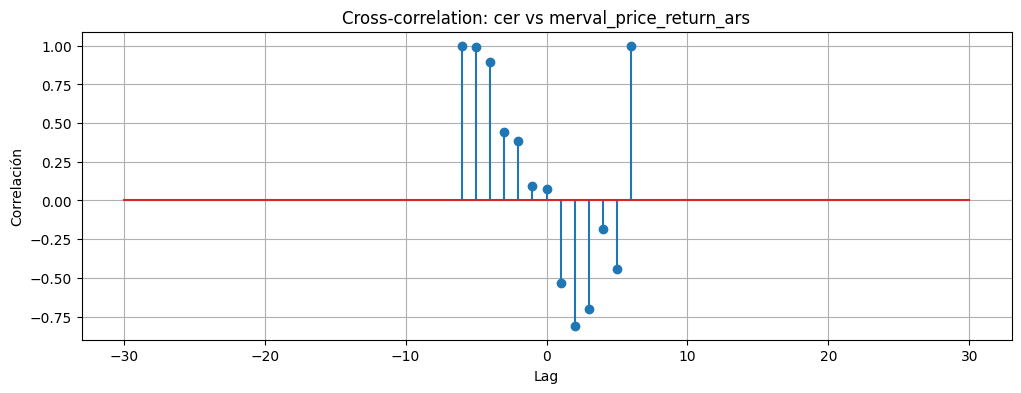

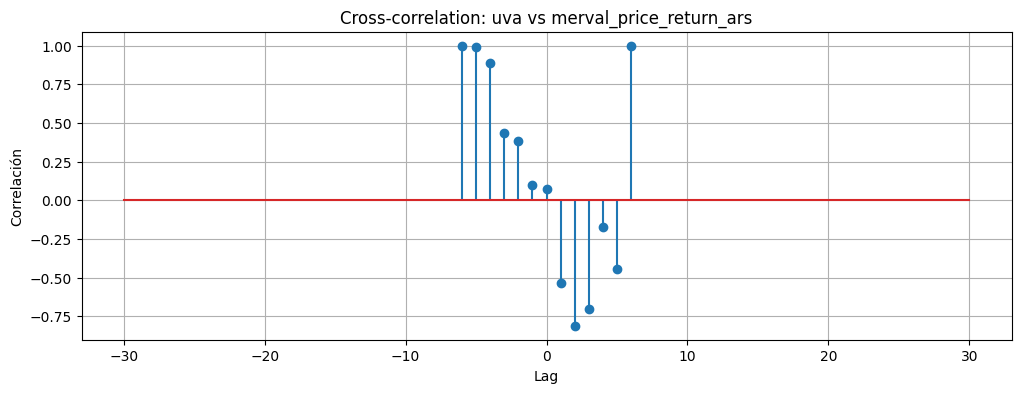

In [20]:
#1. Creamos un diccionario para guardar series interpoladas.
series_interpoladas = {}

#2. Recorremos todas las series y entendemos su frencuencia.
for _, row in diccionario.iterrows():
    var = row['serie']
    freq_type = row['frecuencia']  # 'diaria' o 'mensual'
    
    #a. Extraigo la serie.
    y = series_temporales[['fecha', var]].copy().set_index('fecha')
    
    #b. Reindexo según la frecuencia.
    if freq_type == 'diaria':
        y = y.asfreq('D')
    elif freq_type == 'mensual':
        y = y.asfreq('M')
    
    #c. Interpolación lineal.
    y_filled = y.interpolate(method='linear')
    
    #d. Guardo la serie interpolada.
    series_interpoladas[var] = y_filled[var]

#3. Combinamos todas las series en un único DataFrame.
df_all = pd.DataFrame(series_interpoladas)

#4. Alineo fechas y elimino filas con NA residuales.
df_all = df_all.dropna()

#5. Calculo correlación con merval_price_return_ars.
#a. Correlación contemporánea (lag 0).
correlations = df_all.corr()['merval_price_return_ars'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
correlations.drop('merval_price_return_ars').plot(kind='bar')
plt.title("Correlación contemporánea con merval_price_return_ars")
plt.ylabel("Correlación")
plt.grid(True)
plt.show()

#b. Cross-correlation con lags (!= 0).
lags = 30
for var in df_all.columns:
    if var == 'merval_price_return_ars':
        continue
    cross_corr = [df_all['merval_price_return_ars'].corr(df_all[var].shift(lag)) for lag in range(-lags, lags+1)]
    plt.figure(figsize=(12,4))
    plt.stem(range(-lags, lags+1), cross_corr)
    plt.title(f"Cross-correlation: {var} vs merval_price_return_ars")
    plt.xlabel("Lag")
    plt.ylabel("Correlación")
    plt.grid(True)
    plt.show()